# Try to identify B73 and BTx623 Orthologs
Study orthologous expression patterns<br>
Which genes are similarly expressed in time?<br>
Which genes are not similarly expressed in time?<br>

In [1]:
#set wd
setwd("/Users/Home/Desktop/BLIND/B73_BTx623_orth")

## Load maize and sorghum data with prior ETU measures
filter gene set by precalculated gene orthology
<br> try linear correlation methods to compare expression v ETU


In [2]:
#load maize count data
#create a count matrix from htseq count files
file_names <- list.files(path="./B73_htseq", pattern = "*.txt") # create a list of all txt files in the "edgeR" folder
file_paths <- list.files(path="./B73_htseq", pattern = "*.txt", full.names=T) # create a list of all txt files' full locations in the "edgeR" folder

counts <- read.table(file_paths[1], sep="\t", header=F, row.names=1) # start by reading the first file
colnames(counts) <- c(file_names[1]) # name the first column
for (f in 2:length(file_paths)) { # loop over all the rest of the files
new_file <- read.table(file_paths[f], sep="\t", header=F, row.names=1)
print ("Merging file...")
counts <- cbind(counts, new_file) # add on the new column
colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}

B73_count <- head(counts,-5) #remove last 5 lines, describing reads that were not attributed to gene models

[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."


In [3]:
#load sorghum count data
#create a count matrix from htseq count files
file_names <- list.files(path="./BTx623_htseq", pattern = "*.txt") # create a list of all txt files in the "edgeR" folder
file_paths <- list.files(path="./BTx623_htseq", pattern = "*.txt", full.names=T) # create a list of all txt files' full locations in the "edgeR" folder

counts <- read.table(file_paths[1], sep="\t", header=F, row.names=1) # start by reading the first file
colnames(counts) <- c(file_names[1]) # name the first column
for (f in 2:length(file_paths)) { # loop over all the rest of the files
new_file <- read.table(file_paths[f], sep="\t", header=F, row.names=1)
print ("Merging file...")
counts <- cbind(counts, new_file) # add on the new column
colnames(counts) <- c(file_names[1:f]) # add on the new column's name
}

BTx623_count <- head(counts,-5) #remove last 5 lines, describing reads that were not attributed to gene models

[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Merging file..."
[1] "Mergi

In [4]:
#rename sorghum genes to trim ".v3.2"
# current SbGIDS
old.rownames <- rownames(BTx623_count)
head(old.rownames)

# chop off extra bit
simple.rownames <- substr(old.rownames,1,nchar(old.rownames)-5)
head(simple.rownames)


[1] "Sobic.001G000100.v3.2" "Sobic.001G000200.v3.2" "Sobic.001G000300.v3.2"
[4] "Sobic.001G000400.v3.2" "Sobic.001G000501.v3.2" "Sobic.001G000700.v3.2"

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000300" "Sobic.001G000400"
[5] "Sobic.001G000501" "Sobic.001G000700"

In [5]:
#rename
rownames (BTx623_count) <- simple.rownames
head(rownames(BTx623_count))

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000300" "Sobic.001G000400"
[5] "Sobic.001G000501" "Sobic.001G000700"

In [6]:
## create VSD objects for B73 and BTx623
require(DESeq2)

#B73
dds.vsd <- DESeqDataSetFromMatrix(countData = B73_count,
                                colData = data.frame(colnames(B73_count)),
                                design = ~ 1,
                                tidy = F)
dds.vsd <- estimateSizeFactors(dds.vsd)
dds.vsd <- dds.vsd[ rowSums(counts(dds.vsd, normalized=TRUE) >= 5) > 3, ] #only consider detected genes, >= 5 RPM in more than 3 tissues
dds.vsd <- estimateDispersions(dds.vsd)
vsd <- varianceStabilizingTransformation(dds.vsd)
vsdB73 <- assay(vsd)

#BTx623
dds.vsd <- DESeqDataSetFromMatrix(countData = BTx623_count,
                                colData = data.frame(colnames(BTx623_count)),
                                design = ~ 1,
                                tidy = F)
dds.vsd <- estimateSizeFactors(dds.vsd)
dds.vsd <- dds.vsd[ rowSums(counts(dds.vsd, normalized=TRUE) >= 5) > 3, ] #only consider detected genes, >= 5 RPM in more than 3 tissues
dds.vsd <- estimateDispersions(dds.vsd)
vsd <- varianceStabilizingTransformation(dds.vsd)
vsdBTx623 <- assay(vsd)


Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.

In [7]:
#load ETU data for B73 and BTx623
B73_factors <- read.table("./B73_ETU_factors.txt", sep="\t", header=T)
BTx623_factors <- read.table("./BTx623_ETU_factors.txt", sep="\t", header=T)
head(B73_factors); head(BTx623_factors)

K5_stage ETU  DAS
SHSL002_35_S35.count.txt 1        0.00 34 
SHSL002_36_S36.count.txt 1        0.00 33 
SHSL002_37_S37.count.txt 1        0.00 33 
SHSL002_33_S33.count.txt 1        0.04 34 
SHSL002_38_S38.count.txt 1        0.18 33 
SHSL002_40_S40.count.txt 1        0.39 32

K4_stage ETU  DAS panicle_height
SHSL001_47_S47.count.txt 1        0.00 61  0.359         
SHSL001_46_S46.count.txt 1        0.30 61  0.248         
SHSL001_45_S45.count.txt 1        0.59 61  0.972         
SHSL001_42_S42.count.txt 2        0.88 62  1.033         
SHSL001_43_S43.count.txt 2        1.21 62  1.386         
SHSL001_39_S39.count.txt 2        1.49 63  0.955

In [8]:
#Load gene ortholog information
orth <- read.csv("./sb3si2_intelligent.csv", header=T)
head(orth)

sorghum2         maize1        maize2  setaria22      viridis            
1 Sobic.001G000100 GRMZM2G007948 No Gene Seita.9G000900 Sevir.9G001200.1.v1
2 Sobic.001G000200 GRMZM2G007675 No Gene Seita.9G001000 Sevir.9G001300.1.v1
3 Sobic.001G000400 GRMZM2G391815 No Gene Seita.9G001100 Sevir.9G001400.1.v1
4 Sobic.001G000300 No Gene       No Gene No Gene        No Gene            
5 Sobic.001G000501 No Gene       No Gene No Gene        No Gene            
6 Sobic.001G000700 GRMZM2G077183 No Gene Seita.9G001200 Sevir.9G001500.1.v1
  dichan   oropetium                 rice    brachy      
1 No Gene  Oropetium_20150105_23638A No Gene No Gene     
2 No Gene  Oropetium_20150105_23637A No Gene Bradi1g00450
3 No Gene  Oropetium_20150105_23636A No Gene Bradi1g00460
4 No Gene  No Gene                   No Gene No Gene     
5 No Gene  No Gene                   No Gene No Gene     
6 Do020261 Oropetium_20150105_23634A No Gene Bradi1g00470
  GEvo.Link                                                                                                                                                                                                             
1 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000100;accn2=GRMZM2G007948;accn3=Seita.9G000900;accn4=Sevir.9G001200.1.v1;accn5=Oropetium_20150105_23638A;num_seqs=5;autogo=1                                  
2 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000200;accn2=GRMZM2G007675;accn3=Seita.9G001000;accn4=Sevir.9G001300.1.v1;accn5=Oropetium_20150105_23637A;accn6=Bradi1g00450;num_seqs=6;autogo=1               
3 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000400;accn2=GRMZM2G391815;accn3=Seita.9G001100;accn4=Sevir.9G001400.1.v1;accn5=Oropetium_20150105_23636A;accn6=Bradi1g00460;num_seqs=6;autogo=1               
4 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000300;num_seqs=1;autogo=1                                                                                                                                     
5 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000501;num_seqs=1;autogo=1                                                                                                                                     
6 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000700;accn2=GRMZM2G077183;accn3=Seita.9G001200;accn4=Sevir.9G001500.1.v1;accn5=Do020261;accn6=Oropetium_20150105_23634A;accn7=Bradi1g00470;num_seqs=7;autogo=1

Identify orthologs
<br>Calculate rolling avg (per 0.5 ETU?)
<br>Sort by max expression
<br>Try sorghum centric (2 maize plots)
<br>Try maize centric (duplicate sorghum as necesary)
<br>Plot as heatmap, B73-BTx623 side-by-side

In [10]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”

       X1              X2          
 Min.   :0.000   Min.   :-1.52418  
 1st Qu.:1.845   1st Qu.:-0.70747  
 Median :5.125   Median :-0.06938  
 Mean   :4.841   Mean   : 0.00000  
 3rd Qu.:7.415   3rd Qu.: 0.40648  
 Max.   :9.750   Max.   : 2.34347  

x          y        
1 0.00000000 -1.021841
2 0.00975976 -1.018571
3 0.01951952 -1.015298
4 0.02927928 -1.012023
5 0.03903904 -1.008746
6 0.04879880 -1.005467

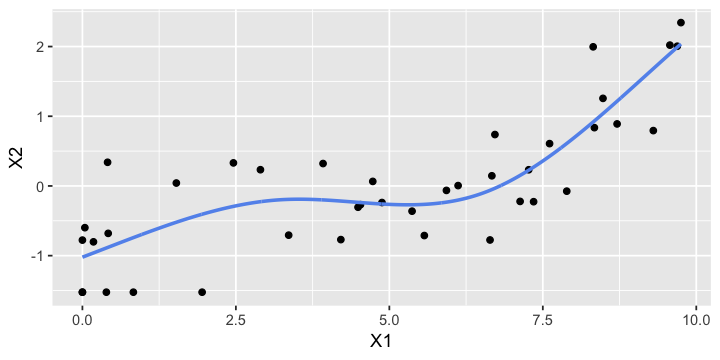

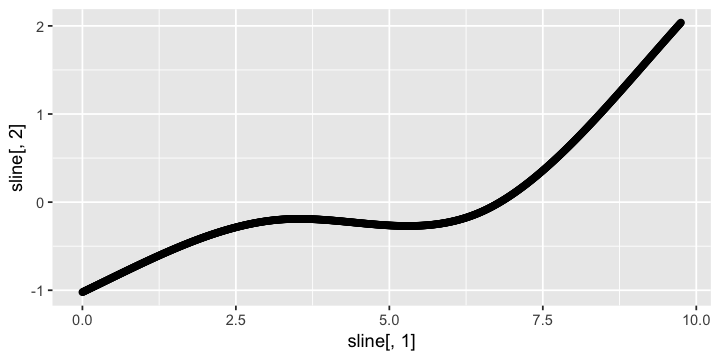

In [11]:
## TRY using smoothing spline to create full expression trajectory

vsdB73.Z <- t(scale(t(vsdB73))) #create a temp copy of VSD, z-scaled
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73.Z[2,])),]$ETU,vsdB73.Z[2,])) #grab data for gene 1
summary(df)
#fit a 5-knot b spline in ggplot -- extract interpolated values

#gives y, pred values as function of x, try extracting line values and assign to regression based on euclidian distance
p <- ggplot(data=df, aes(X1, X2)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=1000)
sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object

head(sline)
options(repr.plot.width=6, repr.plot.height=3)
p
qplot(sline[,1], sline[,2])


In [12]:
head(vsdB73)
head(t(scale(t(vsdB73))))

SHSL002_01_S1.count.txt SHSL002_02_S2.count.txt
AC148152.3_FG005 5.424691                5.900154               
AC148152.3_FG008 6.199087                6.298309               
AC148167.6_FG001 9.087430                9.047926               
AC149475.2_FG002 9.384166                9.491251               
AC149475.2_FG003 9.367993                9.606069               
AC149475.2_FG005 9.038237                8.320089               
                 SHSL002_03_S3.count.txt SHSL002_04_S4.count.txt
AC148152.3_FG005 5.331088                5.790279               
AC148152.3_FG008 6.191532                5.505118               
AC148167.6_FG001 9.407426                9.128950               
AC149475.2_FG002 9.520670                9.585393               
AC149475.2_FG003 9.572567                9.661849               
AC149475.2_FG005 8.891601                9.099413               
                 SHSL002_05_S5.count.txt SHSL002_06_S6.count.txt
AC148152.3_FG005 5.439939                5.508794               
AC148152.3_FG008 5.804842                5.508794               
AC148167.6_FG001 9.219800                9.271593               
AC149475.2_FG002 9.576897                9.643979               
AC149475.2_FG003 9.538590                9.616516               
AC149475.2_FG005 9.252479                9.159473               
                 SHSL002_07_S7.count.txt SHSL002_08_S8.count.txt
AC148152.3_FG005 5.670740                5.109870               
AC148152.3_FG008 5.340045                5.964356               
AC148167.6_FG001 9.136671                9.136880               
AC149475.2_FG002 9.677701                9.540711               
AC149475.2_FG003 9.537386                9.625680               
AC149475.2_FG005 9.165834                8.915807               
                 SHSL002_09_S9.count.txt SHSL002_10_S10.count.txt ⋯
AC148152.3_FG005 5.109870                5.109870                 ⋯
AC148152.3_FG008 5.822233                6.194215                 ⋯
AC148167.6_FG001 9.272497                9.001154                 ⋯
AC149475.2_FG002 9.285839                9.772840                 ⋯
AC149475.2_FG003 9.562745                9.864410                 ⋯
AC149475.2_FG005 8.506343                8.410764                 ⋯
                 SHSL002_31_S31.count.txt SHSL002_32_S32.count.txt
AC148152.3_FG005  5.109870                 5.591048               
AC148152.3_FG008  5.682537                 5.591048               
AC148167.6_FG001  9.011361                 8.899482               
AC149475.2_FG002  9.233203                 9.598237               
AC149475.2_FG003 10.112639                10.117558               
AC149475.2_FG005  8.902845                 8.808321               
                 SHSL002_33_S33.count.txt SHSL002_34_S34.count.txt
AC148152.3_FG005  5.311106                5.109870                
AC148152.3_FG008  5.394231                5.109870                
AC148167.6_FG001  8.975693                9.054968                
AC149475.2_FG002  9.669921                9.516733                
AC149475.2_FG003 10.038639                9.761212                
AC149475.2_FG005  8.691488                9.078130                
                 SHSL002_35_S35.count.txt SHSL002_36_S36.count.txt
AC148152.3_FG005 5.109870                 5.109870                
AC148152.3_FG008 5.339430                 5.109870                
AC148167.6_FG001 9.150077                 9.245175                
AC149475.2_FG002 9.286311                 9.324824                
AC149475.2_FG003 9.587439                 9.736513                
AC149475.2_FG005 9.088475                 8.980680                
                 SHSL002_37_S37.count.txt SHSL002_38_S38.count.txt
AC148152.3_FG005 5.109870                  5.109870               
AC148152.3_FG008 5.109870                  5.331800               
AC148167.6_FG001 9.298365                  9.154044               
AC149475.2_FG002 9.380940                  9.5

SHSL002_01_S1.count.txt SHSL002_02_S2.count.txt
AC148152.3_FG005  0.1387583               2.1309008             
AC148152.3_FG008  2.0205577               2.3434671             
AC148167.6_FG001 -0.4573357              -0.7522169             
AC149475.2_FG002 -0.1655265               0.3293864             
AC149475.2_FG003 -1.8684264              -0.7223841             
AC149475.2_FG005  0.4740566              -1.7754394             
                 SHSL002_03_S3.count.txt SHSL002_04_S4.count.txt
AC148152.3_FG005 -0.25342924              1.6705371             
AC148152.3_FG008  1.99597123             -0.2378873             
AC148167.6_FG001  1.93129718             -0.1474048             
AC149475.2_FG002  0.46535452              0.7644881             
AC149475.2_FG003 -0.88365708             -0.4538758             
AC149475.2_FG005  0.01473995              0.6656819             
                 SHSL002_05_S5.count.txt SHSL002_06_S6.count.txt
AC148152.3_FG005  0.2026459               0.4911400             
AC148152.3_FG008  0.7375297              -0.2259252             
AC148167.6_FG001  0.5307502               0.9173657             
AC149475.2_FG002  0.7252210               1.0352557             
AC149475.2_FG003 -1.0472122              -0.6720946             
AC149475.2_FG005  1.1451401               0.8538112             
                 SHSL002_07_S7.count.txt SHSL002_08_S8.count.txt
AC148152.3_FG005  1.16968021             -1.18031253            
AC148152.3_FG008 -0.77510024              1.25665247            
AC148167.6_FG001 -0.08977124             -0.08820894            
AC149475.2_FG002  1.19111002              0.55797854            
AC149475.2_FG003 -1.05300988             -0.62798174            
AC149475.2_FG005  0.87373444              0.09056069            
                 SHSL002_09_S9.count.txt SHSL002_10_S10.count.txt ⋯
AC148152.3_FG005 -1.1803125              -1.1803125               ⋯
AC148152.3_FG008  0.7941297               2.0047027               ⋯
AC148167.6_FG001  0.9241131              -1.1013498               ⋯
AC149475.2_FG002 -0.6199700               1.6308114               ⋯
AC149475.2_FG003 -0.9309380               0.5212044               ⋯
AC149475.2_FG005 -1.1920253              -1.4914148               ⋯
                 SHSL002_31_S31.count.txt SHSL002_32_S32.count.txt
AC148152.3_FG005 -1.18031253               0.83577729             
AC148152.3_FG008  0.33950164               0.04176214             
AC148167.6_FG001 -1.02515585              -1.86029087             
AC149475.2_FG002 -0.86323891               0.82384756             
AC149475.2_FG003  1.71611878               1.73979946             
AC149475.2_FG005  0.04996072              -0.24612342             
                 SHSL002_33_S33.count.txt SHSL002_34_S34.count.txt
AC148152.3_FG005 -0.3371547               -1.18031253             
AC148152.3_FG008 -0.5987594               -1.52417887             
AC148167.6_FG001 -1.2914064               -0.69965333             
AC149475.2_FG002  1.1551487                0.44715993             
AC149475.2_FG003  1.3599036                0.02443697             
AC149475.2_FG005 -0.6120873                0.59901524             
                 SHSL002_35_S35.count.txt SHSL002_36_S36.count.txt
AC148152.3_FG005 -1.18031253              -1.18031253             
AC148152.3_FG008 -0.77710034              -1.52417887             
AC148167.6_FG001  0.01029649               0.72016620             
AC149475.2_FG002 -0.61778555              -0.43979041             
AC149475.2_FG003 -0.81206370              -0.09445888             
AC149475.2_FG005  0.63142024               0.29376652             
                 SHSL002_37_S37.count.txt SHSL002_38_S38.count.txt
AC148152.3_FG005 -1.18031253              -1.18031253             
AC148152.3_FG008 -1.52417887              -0.80193431             
AC148167.6_FG001  1.11720739               0.03990793             
AC149475.2_FG002 -0.18043883               0.6

x          y           
1 0.00000000 -0.054126417
2 0.00975976 -0.042559429
3 0.01951952 -0.031071923
4 0.02927928 -0.019663659
5 0.03903904 -0.008334394
6 0.04879880  0.002916112

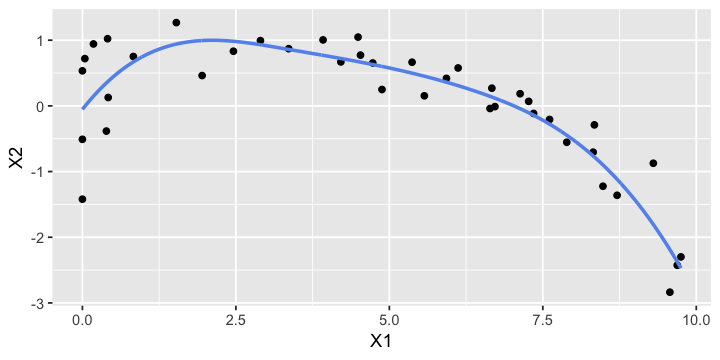

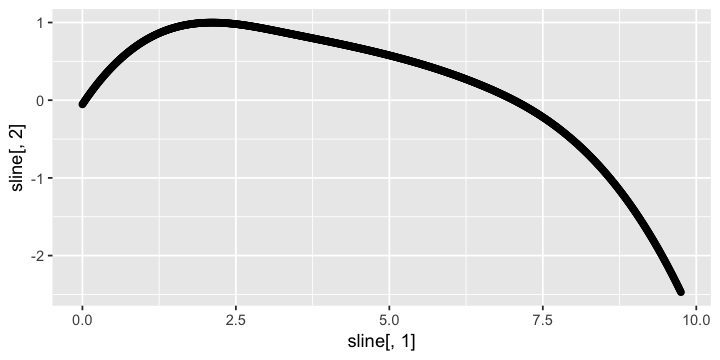

In [13]:
## TRY using smoothing spline to create full expression trajectory

vsdB73.Z <- t(scale(t(vsdB73))) #create a temp copy of VSD, z-scaled
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73.Z["GRMZM2G017087",])),]$ETU,vsdB73.Z["GRMZM2G017087",])) #grab data for gene 1

#fit a 5-knot b spline in ggplot -- extract interpolated values

#gives y, pred values as function of x, try extracting line values and assign to regression based on euclidian distance
p <- ggplot(data=df, aes(X1, X2)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=1000)
sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object

head(sline)
options(repr.plot.width=6, repr.plot.height=3)
p
qplot(sline[,1], sline[,2])


In [14]:
#now as a function that can process all genes
geneSpline <- function(GeneExpressionSlice, ETU_df, N_interpol) {
    require(ggplot2)
    
    df <- data.frame(cbind(ETU_df[rownames(data.frame(GeneExpressionSlice)),]$ETU, GeneExpressionSlice))
    p <- ggplot(data=df, aes(V1, GeneExpressionSlice)) + 
		geom_point() + 
		stat_smooth(method="lm", formula= y~splines::bs(x,5), se=F, color="cornflowerblue", n=N_interpol)
    sline <- ggplot_build(p)$data[[2]][1:2] #extract data from ggplot object
    
    return (sline)
    
    }

In [210]:
N_interpol <- 1000

vsdB73.spline <- vsdB73.Z
splineB73 <- geneSpline (vsdB73.spline[1,], B73_factors, N_interpol)
colnames(splineB73)[2]<-rownames(vsdB73.spline)[1]

for (rowN in 2:nrow(vsdB73)) {
    splineB73 <- cbind(splineB73, geneSpline (vsdB73.spline[rowN,], B73_factors, N_interpol)[,2])
    colnames(splineB73)[rowN+1]<-rownames(vsdB73.spline)[rowN]
}
#is this a mistake to run on all genes?
#seems like it-- let run, but work on creating list of orthologs first

In [203]:
geneSpline (vsdB73.spline["GRMZM2G017087",], B73_factors, 975)

x          y           
1   0.00000000 -0.054126417
2   0.01001027 -0.042263582
3   0.02002053 -0.030484356
4   0.03003080 -0.018788478
5   0.04004107 -0.007175688
6   0.05005133  0.004354275
7   0.06006160  0.015801671
8   0.07007187  0.027166762
9   0.08008214  0.038449806
10  0.09009240  0.049651066
11  0.10010267  0.060770801
12  0.11011294  0.071809272
13  0.12012320  0.082766739
14  0.13013347  0.093643464
15  0.14014374  0.104439706
16  0.15015400  0.115155726
17  0.16016427  0.125791785
18  0.17017454  0.136348143
19  0.18018480  0.146825061
20  0.19019507  0.157222798
21  0.20020534  0.167541617
22  0.21021561  0.177781777
23  0.22022587  0.187943539
24  0.23023614  0.198027163
25  0.24024641  0.208032910
26  0.25025667  0.217961040
27  0.26026694  0.227811814
28  0.27027721  0.237585493
29  0.28028747  0.247282336
30  0.29029774  0.256902605
⋮   ⋮          ⋮           
946 9.459702   -2.026469   
947 9.469713   -2.040874   
948 9.479723   -2.055343   
949 9.489733   -2.069878   
950 9.499743   -2.084476   
951 9.509754   -2.099140   
952 9.519764   -2.113869   
953 9.529774   -2.128664   
954 9.539784   -2.143523   
955 9.549795   -2.158449   
956 9.559805   -2.173440   
957 9.569815   -2.188497   
958 9.579825   -2.203621   
959 9.589836   -2.218811   
960 9.599846   -2.234067   
961 9.609856   -2.249391   
962 9.619867   -2.264781   
963 9.629877   -2.280238   
964 9.639887   -2.295763   
965 9.649897   -2.311355   
966 9.659908   -2.327015   
967 9.669918   -2.342742   
968 9.679928   -2.358538   
969 9.689938   -2.374402   
970 9.699949   -2.390334   
971 9.709959   -2.406335   
972 9.719969   -2.422404   
973 9.729979   -2.438542   
974 9.739990   -2.454750   
975 9.750000   -2.471027

In [204]:
head(splineB73[1:10])
dim(splineB73)

x         AC148152.3_FG005 AC148152.3_FG008 AC148167.6_FG001 AC149475.2_FG002
1 0.0000000 -1.3178024       -1.0218412        0.06882208      -0.01283637     
2 0.1005155 -1.1428149       -0.9880548       -0.12161938       0.03385325     
3 0.2010309 -0.9833926       -0.9540771       -0.29516360       0.07069293     
4 0.3015464 -0.8388504       -0.9199792       -0.45240284       0.09818035     
5 0.4020619 -0.7085035       -0.8858323       -0.59392939       0.11681317     
6 0.5025773 -0.5916667       -0.8517074       -0.72033551       0.12708908     
  AC149475.2_FG003 AC149475.2_FG005 AC149475.2_FG007 AC149810.2_FG008
1 0.3038628        -0.15567665       0.81887079      -0.2308465      
2 0.4381778        -0.11922485       0.49653188      -0.3531002      
3 0.5593424        -0.08956179       0.20465845      -0.4635640      
4 0.6678171        -0.06627068      -0.05793149      -0.5627031      
5 0.7640623        -0.04893477      -0.29241991      -0.6509824      
6 0.8485381        -0.03713728      -0.49998878      -0.7288671      
  AC149818.2_FG001
1 -0.2056052      
2 -0.1993827      
3 -0.1895828      
4 -0.1764879      
5 -0.1603802      
6 -0.1415424

[1]    98 24728

In [211]:
splineB73.RN <- splineB73[,-1]
rownames(splineB73.RN) <- as.character(splineB73[,1])
tsplineB73.RN <- data.frame(t(splineB73.RN))

In [309]:
write.table(tsplineB73.RN, "./B73_spline.txt", sep="\t", quote=F)

In [206]:
#try gene heatmap
#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(splineB73.RN)))
geneDistMatrix <- as.matrix( geneDists )



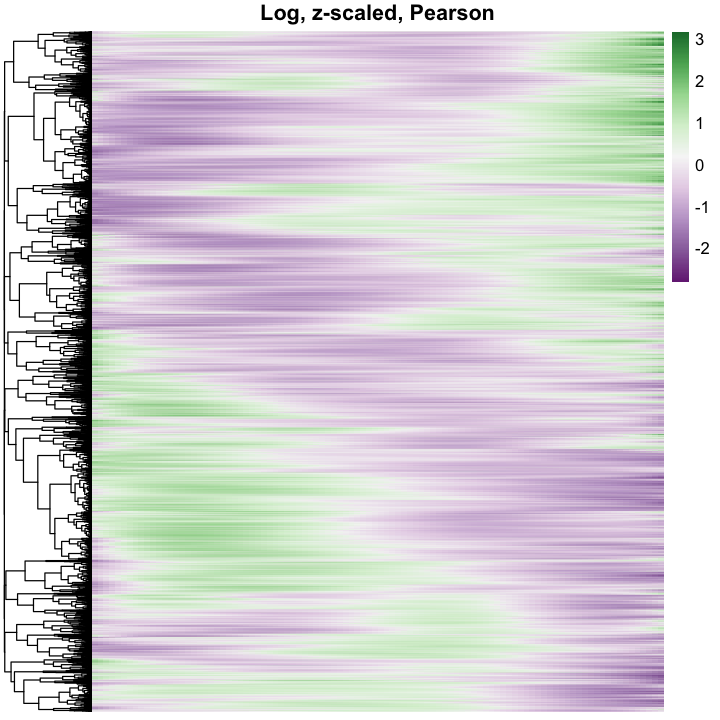

In [207]:
tsplineB73.RN <- data.frame(t(splineB73.RN))

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineB73.RN,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Pearson")

In [208]:
#same but for sorgs

In [212]:
N_interpol <- 1000

vsdBTx623.Z <- t(scale(t(vsdBTx623)))
vsdBTx623.spline <- vsdBTx623.Z
splineBTx623 <- geneSpline (vsdBTx623.spline[1,], BTx623_factors, N_interpol)
colnames(splineBTx623)[2]<-rownames(vsdBTx623.spline)[1]

for (rowN in 2:nrow(vsdBTx623.Z)) {
    splineBTx623 <- cbind(splineBTx623, geneSpline (vsdBTx623.spline[rowN,], BTx623_factors, N_interpol)[,2])
    colnames(splineBTx623)[rowN+1]<-rownames(vsdBTx623.spline)[rowN]
}
#is this a mistake to run on all genes?
#seems like it-- let run, but work on creating list of orthologs first

In [213]:
splineBTx623.RN <- splineBTx623[,-1]
rownames(splineBTx623.RN) <- splineBTx623[,1]
tsplineBTx623.RN <- data.frame(t(splineBTx623.RN))

In [310]:
write.table(tsplineBTx623.RN, "./BTx623_spline.txt", sep="\t", quote=F)

In [ ]:
#try gene heatmap
#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(splineBTx623.RN)))
geneDistMatrix <- as.matrix( geneDists )


In [ ]:
colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineBTx623.RN,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Pearson")

## Assign orthogroups
Each sorghum gene may have 2 maize orthologs,  
So assign maize subgenome1-to-sorghum,  
and maize subgenome2-to-sorghum separately  

In [214]:
#using scaled, transposed matrix from above
require(magrittr)

maize_genes <- tsplineB73.RN %>%
                rownames() 
sorghum_genes <- tsplineBTx623.RN %>%
                rownames() 


length(maize_genes)
length(sorghum_genes)

[1] 24727

[1] 22755

In [215]:
#using orthology matrix, orth from above
#create maize1 and maize2 subsets of orthology table
maize1 <- orth[(orth$maize1!="No Gene"),]
maize2 <- orth[(orth$maize2!="No Gene"),]
dim(maize1)
dim(maize2)
#remember, some maize genes match multiple sorghum genes-- will this be a problem?

[1] 16965    10

[1] 10891    10

In [216]:
require (magrittr) #for maize1 orthologs
#use maize1 Sb genes to subset and reorder Sb expression matrix
#use maize1 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize1.BTx623 <- tBTx623[match(maize1$sorghum2, rownames(tBTx623)),]

tB73 <- t(splineB73.RN)
maize1.B73 <- tB73[match(maize1$maize1, rownames(tB73)),]

head(maize1)
head(maize1.BTx623)
dim(maize1.BTx623)
head(maize1.B73)
dim(maize1.B73)

sorghum2         maize1        maize2  setaria22      viridis            
1 Sobic.001G000100 GRMZM2G007948 No Gene Seita.9G000900 Sevir.9G001200.1.v1
2 Sobic.001G000200 GRMZM2G007675 No Gene Seita.9G001000 Sevir.9G001300.1.v1
3 Sobic.001G000400 GRMZM2G391815 No Gene Seita.9G001100 Sevir.9G001400.1.v1
6 Sobic.001G000700 GRMZM2G077183 No Gene Seita.9G001200 Sevir.9G001500.1.v1
7 Sobic.001G000800 GRMZM2G077222 No Gene Seita.9G001300 Sevir.9G001600.1.v1
8 Sobic.001G000900 GRMZM2G377477 No Gene Seita.9G001400 Sevir.9G001700.1.v1
  dichan   oropetium                 rice           brachy      
1 No Gene  Oropetium_20150105_23638A No Gene        No Gene     
2 No Gene  Oropetium_20150105_23637A No Gene        Bradi1g00450
3 No Gene  Oropetium_20150105_23636A No Gene        Bradi1g00460
6 Do020261 Oropetium_20150105_23634A No Gene        Bradi1g00470
7 Do020257 Oropetium_20150105_23633A LOC_Os03g64400 Bradi1g00480
8 Do020259 Oropetium_20150105_23632A LOC_Os03g64390 No Gene     
  GEvo.Link                                                                                                                                                                                                                                  
1 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000100;accn2=GRMZM2G007948;accn3=Seita.9G000900;accn4=Sevir.9G001200.1.v1;accn5=Oropetium_20150105_23638A;num_seqs=5;autogo=1                                                       
2 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000200;accn2=GRMZM2G007675;accn3=Seita.9G001000;accn4=Sevir.9G001300.1.v1;accn5=Oropetium_20150105_23637A;accn6=Bradi1g00450;num_seqs=6;autogo=1                                    
3 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000400;accn2=GRMZM2G391815;accn3=Seita.9G001100;accn4=Sevir.9G001400.1.v1;accn5=Oropetium_20150105_23636A;accn6=Bradi1g00460;num_seqs=6;autogo=1                                    
6 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000700;accn2=GRMZM2G077183;accn3=Seita.9G001200;accn4=Sevir.9G001500.1.v1;accn5=Do020261;accn6=Oropetium_20150105_23634A;accn7=Bradi1g00470;num_seqs=7;autogo=1                     
7 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000800;accn2=GRMZM2G077222;accn3=Seita.9G001300;accn4=Sevir.9G001600.1.v1;accn5=Do020257;accn6=Oropetium_20150105_23633A;accn7=LOC_Os03g64400;accn8=Bradi1g00480;num_seqs=8;autogo=1
8 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G000900;accn2=GRMZM2G377477;accn3=Seita.9G001400;accn4=Sevir.9G001700.1.v1;accn5=Do020259;accn6=Oropetium_20150105_23632A;accn7=LOC_Os03g64390;num_seqs=7;autogo=1

0            0.00985985985985986 0.0197197197197197
Sobic.001G000100  0.005344583 -0.005843878        -0.01692880       
Sobic.001G000200 -0.294728438 -0.296178125        -0.29762051       
Sobic.001G000400  0.088833902  0.085370233         0.08190239       
Sobic.001G000700 -0.915124117 -0.905803345        -0.89657626       
Sobic.001G000800 -1.632655125 -1.606850721        -1.58126125       
Sobic.001G000900  1.363670005  1.348158469         1.33275068       
                 0.0295795795795796 0.0394394394394394 0.0492992992992993
Sobic.001G000100 -0.02791056        -0.03878950        -0.04956601       
Sobic.001G000200 -0.29905561        -0.30048344        -0.30190402       
Sobic.001G000400  0.07843047         0.07495459         0.07147485       
Sobic.001G000700 -0.88744248        -0.87840164        -0.86945337       
Sobic.001G000800 -1.55588594        -1.53072404        -1.50577477       
Sobic.001G000900  1.31744630         1.30224500         1.28714647       
                 0.0591591591591592 0.069019019019019 0.0788788788788789
Sobic.001G000100 -0.06024043        -0.07081313       -0.08128448       
Sobic.001G000200 -0.30331737        -0.30472350       -0.30612245       
Sobic.001G000400  0.06799135         0.06450421        0.06101352       
Sobic.001G000700 -0.86059727        -0.85183300       -0.84316016       
Sobic.001G000800 -1.48103739        -1.45651112       -1.43219521       
Sobic.001G000900  1.27215036         1.25725635        1.24246412       
                 0.0887387387387387 ⋯ 9.76126126126126 9.77112112112112
Sobic.001G000100 -0.09165484        ⋯  0.02154479       0.0164464      
Sobic.001G000200 -0.30751421        ⋯  0.39663502       0.3849722      
Sobic.001G000400  0.05751940        ⋯  0.14642849       0.1432843      
Sobic.001G000700 -0.83457838        ⋯  0.46956983       0.4584745      
Sobic.001G000800 -1.40808888        ⋯ -0.13914737      -0.1518247      
Sobic.001G000900  1.22777332        ⋯ -0.30409933      -0.3055234      
                 9.78098098098098 9.79084084084084 9.8007007007007
Sobic.001G000100  0.01130644       0.006124783      0.000901284   
Sobic.001G000200  0.37317803       0.361252072      0.349193822   
Sobic.001G000400  0.14012964       0.136964596      0.133789182   
Sobic.001G000700  0.44726446       0.435939263      0.424498539   
Sobic.001G000800 -0.16461674      -0.177523744     -0.190546147   
Sobic.001G000900 -0.30695145      -0.308383560     -0.309819704   
                 9.81056056056056 9.82042042042042 9.83028028028028
Sobic.001G000100 -0.004364196     -0.009671797     -0.01502166     
Sobic.001G000200  0.337002784      0.324678466      0.31222037     
Sobic.001G000400  0.130603441      0.127407412      0.12420113     
Sobic.001G000700  0.412941902      0.401268967      0.38947935     
Sobic.001G000800 -0.203684326     -0.216938663     -0.23030954     
Sobic.001G000900 -0.311259890     -0.312704124     -0.31415241     
                 9.84014014014014 9.85       
Sobic.001G000100 -0.02041392      -0.02584873
Sobic.001G000200  0.29962802       0.28690090
Sobic.001G000400  0.12098464       0.11775798
Sobic.001G000700  0.37757265       0.36554850
Sobic.001G000800 -0.24379734      -0.25740244
Sobic.001G000900 -0.31560476      -0.31706117

[1] 16965  1000

0          0.00975975975975976 0.0195195195195195
GRMZM2G007948 -0.7969129 -0.7966842          -0.7964755        
GRMZM2G007675 -0.6535427 -0.6436622          -0.6338588        
GRMZM2G391815 -0.2410572 -0.2278552          -0.2148108        
GRMZM2G077183 -0.1351336 -0.1497089          -0.1641161        
GRMZM2G077222 -1.4871887 -1.4698857          -1.4526980        
GRMZM2G377477 -0.6657606 -0.6693256          -0.6728119        
              0.0292792792792793 0.039039039039039 0.0487987987987988
GRMZM2G007948 -0.7962864         -0.7961168        -0.7959666        
GRMZM2G007675 -0.6241321         -0.6144819        -0.6049078        
GRMZM2G391815 -0.2019234         -0.1891922        -0.1766166        
GRMZM2G077183 -0.1783559         -0.1924289        -0.2063359        
GRMZM2G077222 -1.4356254         -1.4186672        -1.4018232        
GRMZM2G377477 -0.6762199         -0.6795501        -0.6828028        
              0.0585585585585586 0.0683183183183183 0.0780780780780781
GRMZM2G007948 -0.7958356         -0.7957234         -0.7956301        
GRMZM2G007675 -0.5954096         -0.5859870         -0.5766396        
GRMZM2G391815 -0.1641958         -0.1519292         -0.1398161        
GRMZM2G077183 -0.2200776         -0.2336547         -0.2470679        
GRMZM2G077222 -1.3850930         -1.3684760         -1.3519720        
GRMZM2G377477 -0.6859782         -0.6890769         -0.6920991        
              0.0878378378378378 ⋯ 9.66216216216216 9.67192192192192
GRMZM2G007948 -0.7955553         ⋯  0.3617257        0.3700764      
GRMZM2G007675 -0.5673672         ⋯ -0.0292978       -0.0211186      
GRMZM2G391815 -0.1278557         ⋯ -0.7773357       -0.7742804      
GRMZM2G077183 -0.2603179         ⋯  1.2106617        1.2099245      
GRMZM2G077222 -1.3355805         ⋯  0.1931366        0.2038390      
GRMZM2G377477 -0.6950452         ⋯  0.4318943        0.4327514      
              9.68168168168168 9.69144144144144 9.7012012012012
GRMZM2G007948  0.37855848       0.387172516      0.395919156   
GRMZM2G007675 -0.01283244      -0.004438884      0.004062523   
GRMZM2G391815 -0.77111728      -0.767845944     -0.764465771   
GRMZM2G077183  1.20910435       1.208200687      1.207213096   
GRMZM2G077222  0.21467689       0.225650735      0.236761127   
GRMZM2G377477  0.43359713       0.434431401      0.435254125   
              9.71096096096096 9.72072072072072 9.73048048048048
GRMZM2G007948  0.40479904       0.4138128        0.42296104     
GRMZM2G007675  0.01267223       0.0213907        0.03021837     
GRMZM2G391815 -0.76097619      -0.7573766       -0.75366654     
GRMZM2G077183  1.20614112       1.2049843        1.20374223     
GRMZM2G077222  0.24800862       0.2593938        0.27091720     
GRMZM2G377477  0.43606520       0.4368645        0.43765203     
              9.74024024024024 9.75       
GRMZM2G007948  0.4322444        0.44166357
GRMZM2G007675  0.0391557        0.04820313
GRMZM2G391815 -0.7498453       -0.74591241
GRMZM2G077183  1.2024144        1.20100040
GRMZM2G077222  0.2825794        0.29438096
GRMZM2G377477  0.4384276        0.43919111

[1] 16965  1000

In [217]:
match('Sobic.001G106200', rownames(maize1.BTx623))

[1] 644

In [218]:
head(tBTx623)
head(maize1$sorghum2[2])
match(maize1$sorghum2[2], rownames(tBTx623))
head(t(tBTx623[match(maize1$sorghum2[2], rownames(tBTx623)),]))
head(maize1.BTx623[2,])

0            0.00985985985985986 0.0197197197197197
Sobic.001G000100  0.005344583 -0.005843878        -0.01692880       
Sobic.001G000200 -0.294728438 -0.296178125        -0.29762051       
Sobic.001G000400  0.088833902  0.085370233         0.08190239       
Sobic.001G000700 -0.915124117 -0.905803345        -0.89657626       
Sobic.001G000800 -1.632655125 -1.606850721        -1.58126125       
Sobic.001G000900  1.363670005  1.348158469         1.33275068       
                 0.0295795795795796 0.0394394394394394 0.0492992992992993
Sobic.001G000100 -0.02791056        -0.03878950        -0.04956601       
Sobic.001G000200 -0.29905561        -0.30048344        -0.30190402       
Sobic.001G000400  0.07843047         0.07495459         0.07147485       
Sobic.001G000700 -0.88744248        -0.87840164        -0.86945337       
Sobic.001G000800 -1.55588594        -1.53072404        -1.50577477       
Sobic.001G000900  1.31744630         1.30224500         1.28714647       
                 0.0591591591591592 0.069019019019019 0.0788788788788789
Sobic.001G000100 -0.06024043        -0.07081313       -0.08128448       
Sobic.001G000200 -0.30331737        -0.30472350       -0.30612245       
Sobic.001G000400  0.06799135         0.06450421        0.06101352       
Sobic.001G000700 -0.86059727        -0.85183300       -0.84316016       
Sobic.001G000800 -1.48103739        -1.45651112       -1.43219521       
Sobic.001G000900  1.27215036         1.25725635        1.24246412       
                 0.0887387387387387 ⋯ 9.76126126126126 9.77112112112112
Sobic.001G000100 -0.09165484        ⋯  0.02154479       0.0164464      
Sobic.001G000200 -0.30751421        ⋯  0.39663502       0.3849722      
Sobic.001G000400  0.05751940        ⋯  0.14642849       0.1432843      
Sobic.001G000700 -0.83457838        ⋯  0.46956983       0.4584745      
Sobic.001G000800 -1.40808888        ⋯ -0.13914737      -0.1518247      
Sobic.001G000900  1.22777332        ⋯ -0.30409933      -0.3055234      
                 9.78098098098098 9.79084084084084 9.8007007007007
Sobic.001G000100  0.01130644       0.006124783      0.000901284   
Sobic.001G000200  0.37317803       0.361252072      0.349193822   
Sobic.001G000400  0.14012964       0.136964596      0.133789182   
Sobic.001G000700  0.44726446       0.435939263      0.424498539   
Sobic.001G000800 -0.16461674      -0.177523744     -0.190546147   
Sobic.001G000900 -0.30695145      -0.308383560     -0.309819704   
                 9.81056056056056 9.82042042042042 9.83028028028028
Sobic.001G000100 -0.004364196     -0.009671797     -0.01502166     
Sobic.001G000200  0.337002784      0.324678466      0.31222037     
Sobic.001G000400  0.130603441      0.127407412      0.12420113     
Sobic.001G000700  0.412941902      0.401268967      0.38947935     
Sobic.001G000800 -0.203684326     -0.216938663     -0.23030954     
Sobic.001G000900 -0.311259890     -0.312704124     -0.31415241     
                 9.84014014014014 9.85       
Sobic.001G000100 -0.02041392      -0.02584873
Sobic.001G000200  0.29962802       0.28690090
Sobic.001G000400  0.12098464       0.11775798
Sobic.001G000700  0.37757265       0.36554850
Sobic.001G000800 -0.24379734      -0.25740244
Sobic.001G000900 -0.31560476      -0.31706117

[1] Sobic.001G000200
34211 Levels: Sobic.001G000100 Sobic.001G000200 ... Sobic.K044505

[1] 2

0          0.00985985985985986 0.0197197197197197 0.0295795795795796
[1,] -0.2947284 -0.2961781          -0.2976205         -0.2990556        
     0.0394394394394394 0.0492992992992993 0.0591591591591592 0.069019019019019
[1,] -0.3004834         -0.301904          -0.3033174         -0.3047235       
     0.0788788788788789 0.0887387387387387 ⋯ 9.76126126126126 9.77112112112112
[1,] -0.3061224         -0.3075142         ⋯ 0.396635         0.3849722       
     9.78098098098098 9.79084084084084 9.8007007007007 9.81056056056056
[1,] 0.373178         0.3612521        0.3491938       0.3370028       
     9.82042042042042 9.83028028028028 9.84014014014014 9.85     
[1,] 0.3246785        0.3122204        0.299628         0.2869009

0 0.00985985985985986  0.0197197197197197  0.0295795795795796 
         -0.2947284          -0.2961781          -0.2976205          -0.2990556 
 0.0394394394394394  0.0492992992992993 
         -0.3004834          -0.3019040

In [219]:
#use maize2 Sb genes to subset and reorder Sb expression matrix
#use maize2 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize2.BTx623 <- tBTx623[match(maize2$sorghum2, rownames(tBTx623)),]

tB73 <- t(splineB73.RN)
maize2.B73 <- tB73[match(maize2$maize2, rownames(tB73)),]

head(maize2)
head(maize2.BTx623)
dim(maize2.BTx623)
head(maize2.B73)
dim(maize2.B73)

sorghum2         maize1        maize2           setaria22     
16 Sobic.001G001800 No Gene       GRMZM2G089409    Seita.9G001900
25 Sobic.001G002600 No Gene       GRMZM2G089498    No Gene       
28 Sobic.001G002800 No Gene       AC220970_4_FG002 Seita.9G002400
30 Sobic.001G003000 No Gene       GRMZM2G035150    Seita.9G002500
32 Sobic.001G003200 No Gene       GRMZM2G144196    Seita.9G002700
35 Sobic.001G003500 GRMZM2G434219 GRMZM5G861064    Seita.9G002900
   viridis             dichan   oropetium                 rice          
16 Sevir.9G002200.1.v1 No Gene  No Gene                   LOC_Os03g64310
25 No Gene             No Gene  Oropetium_20150105_23620A LOC_Os03g64250
28 Sevir.9G002700.1.v1 No Gene  Oropetium_20150105_23617A LOC_Os03g64230
30 Sevir.9G002800.1.v1 No Gene  Oropetium_20150105_23616A LOC_Os03g64219
32 Sevir.9G003000.1.v1 Do001007 Oropetium_20150105_23616A No Gene       
35 Sevir.9G003200.1.v1 Do001002 Oropetium_20150105_23614A LOC_Os03g64190
   brachy      
16 No Gene     
25 Bradi1g00678
28 Bradi1g00710
30 Bradi1g00720
32 Bradi1g00750
35 Bradi1g00820
   GEvo.Link                                                                                                                                                                                                                                                      
16 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G001800;accn2=GRMZM2G089409;accn3=Seita.9G001900;accn4=Sevir.9G002200.1.v1;accn5=LOC_Os03g64310;num_seqs=5;autogo=1                                                                                      
25 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G002600;accn2=GRMZM2G089498;accn3=Oropetium_20150105_23620A;accn4=LOC_Os03g64250;accn5=Bradi1g00678;num_seqs=5;autogo=1                                                                                  
28 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G002800;accn2=AC220970_4_FG002;accn3=Seita.9G002400;accn4=Sevir.9G002700.1.v1;accn5=Oropetium_20150105_23617A;accn6=LOC_Os03g64230;accn7=Bradi1g00710;num_seqs=7;autogo=1                                
30 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G003000;accn2=GRMZM2G035150;accn3=Seita.9G002500;accn4=Sevir.9G002800.1.v1;accn5=Oropetium_20150105_23616A;accn6=LOC_Os03g64219;accn7=Bradi1g00720;num_seqs=7;autogo=1                                   
32 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G003200;accn2=GRMZM2G144196;accn3=Seita.9G002700;accn4=Sevir.9G003000.1.v1;accn5=Do001007;accn6=Oropetium_20150105_23616A;accn7=Bradi1g00750;num_seqs=7;autogo=1                                         
35 http://genomevolution.org/CoGe/GEvo.pl?accn1=Sobic.001G003500;accn2=GRMZM2G434219;accn3=GRMZM5G861064;accn4=Seita.9G002900;accn5=Sevir.9G003200.1.v1;accn6=Do001002;accn7=Oropetium_20150105_23614A;accn8=LOC_Os03g64190;accn9=Bradi1g00820;num_seqs=9;autogo=1

0          0.00985985985985986 0.0197197197197197
Sobic.001G001800  0.5363755  0.5144801           0.4928146        
Sobic.001G002600 -0.3941052 -0.4086173          -0.4229673        
Sobic.001G002800  1.2715995  1.2523715           1.2332965        
Sobic.001G003000 -0.8942758 -0.8854892          -0.8767990        
Sobic.001G003200  0.3896379  0.3813585           0.3731219        
Sobic.001G003500 -1.2046109 -1.1816454          -1.1588614        
                 0.0295795795795796 0.0394394394394394 0.0492992992992993
Sobic.001G001800  0.4713784          0.4501704          0.4291897        
Sobic.001G002600 -0.4371558         -0.4511835         -0.4650509        
Sobic.001G002800  1.2143740          1.1956035          1.1769844        
Sobic.001G003000 -0.8682049         -0.8597063         -0.8513030        
Sobic.001G003200  0.3649283          0.3567774          0.3486691        
Sobic.001G003500 -1.1362581         -1.1138351         -1.0915915        
                 0.0591591591591592 0.069019019019019 0.0788788788788789
Sobic.001G001800  0.4084355          0.3879069         0.3676029        
Sobic.001G002600 -0.4787588         -0.4923076        -0.5056981        
Sobic.001G002800  1.1585162          1.1401983         1.1220302        
Sobic.001G003000 -0.8429945         -0.8347803        -0.8266601        
Sobic.001G003200  0.3406035          0.3325804         0.3245996        
Sobic.001G003500 -1.0695268         -1.0476404        -1.0259315        
                 0.0887387387387387 ⋯ 9.76126126126126 9.77112112112112
Sobic.001G001800  0.3475226         ⋯  0.05615522       0.05965614     
Sobic.001G002600 -0.5189308         ⋯  0.02140719       0.01579207     
Sobic.001G002800  1.1040114         ⋯  0.22950378       0.23500188     
Sobic.001G003000 -0.8186334         ⋯  0.82689845       0.82944370     
Sobic.001G003200  0.3166612         ⋯  0.49760881       0.49735989     
Sobic.001G003500 -1.0043995         ⋯ -1.11344763      -1.11244057     
                 9.78098098098098 9.79084084084084 9.8007007007007
Sobic.001G001800  0.06317523       0.06671250       0.070267921   
Sobic.001G002600  0.01012878       0.00441713      -0.001343068   
Sobic.001G002800  0.24053788       0.24611190       0.251724025   
Sobic.001G003000  0.83201112       0.83460084       0.837213017   
Sobic.001G003200  0.49710256       0.49683683       0.496562688   
Sobic.001G003500 -1.11136124      -1.11020928      -1.108984328   
                 9.81056056056056 9.82042042042042 9.83028028028028
Sobic.001G001800  0.073841491      0.07743320       0.08104303     
Sobic.001G002600 -0.007151999     -0.01300985      -0.01891680     
Sobic.001G002800  0.257374369      0.26306303       0.26879011     
Sobic.001G003000  0.839847784      0.84250529       0.84518567     
Sobic.001G003200  0.496280123      0.49598913       0.49568971     
Sobic.001G003500 -1.107686021     -1.10631400      -1.10486789     
                 9.84014014014014 9.85       
Sobic.001G001800  0.08467097       0.08831701
Sobic.001G002600 -0.02487305      -0.03087877
Sobic.001G002800  0.27455571       0.28035993
Sobic.001G003000  0.84788908       0.85061566
Sobic.001G003200  0.49538185       0.49506554
Sobic.001G003500 -1.10334735      -1.10175201

[1] 10891  1000

0          0.00975975975975976 0.0195195195195195
<NA>                  NA         NA                  NA        
GRMZM2G089498 -0.6025914 -0.6070345          -0.6114076        
<NA>                  NA         NA                  NA        
GRMZM2G035150 -0.7951004 -0.7827078          -0.7703520        
GRMZM2G144196 -1.3701198 -1.3687797          -1.3674079        
GRMZM5G861064  1.1656764  1.1604627           1.1552687        
              0.0292792792792793 0.039039039039039 0.0487987987987988
<NA>                  NA                 NA                NA        
GRMZM2G089498 -0.6157111         -0.6199453        -0.6241104        
<NA>                  NA                 NA                NA        
GRMZM2G035150 -0.7580330         -0.7457509        -0.7335058        
GRMZM2G144196 -1.3660048         -1.3645704        -1.3631050        
GRMZM5G861064  1.1500943          1.1449395         1.1398044        
              0.0585585585585586 0.0683183183183183 0.0780780780780781
<NA>                  NA                 NA                 NA        
GRMZM2G089498 -0.6282068         -0.6322347         -0.6361946        
<NA>                  NA                 NA                 NA        
GRMZM2G035150 -0.7212976         -0.7091264         -0.6969923        
GRMZM2G144196 -1.3616087         -1.3600817         -1.3585242        
GRMZM5G861064  1.1346887          1.1295925          1.1245157        
              0.0878378378378378 ⋯ 9.66216216216216 9.67192192192192
<NA>                  NA         ⋯         NA               NA      
GRMZM2G089498 -0.6400867         ⋯  0.6663505        0.6592220      
<NA>                  NA         ⋯         NA               NA      
GRMZM2G035150 -0.6848952         ⋯  0.1607176        0.1563539      
GRMZM2G144196 -1.3569363         ⋯  1.3958138        1.3933465      
GRMZM5G861064  1.1194583         ⋯ -1.3289965       -1.3331677      
              9.68168168168168 9.69144144144144 9.7012012012012
<NA>                  NA               NA               NA     
GRMZM2G089498  0.6519894        0.6446522        0.6372100     
<NA>                  NA               NA               NA     
GRMZM2G035150  0.1518981        0.1473499        0.1427086     
GRMZM2G144196  1.3908074        1.3881963        1.3855129     
GRMZM5G861064 -1.3373420       -1.3415192       -1.3456994     
              9.71096096096096 9.72072072072072 9.73048048048048
<NA>                  NA               NA               NA      
GRMZM2G089498  0.6296623        0.6220087        0.6142488      
<NA>                  NA               NA               NA      
GRMZM2G035150  0.1379738        0.1331451        0.1282219      
GRMZM2G144196  1.3827567        1.3799275        1.3770250      
GRMZM5G861064 -1.3498825       -1.3540687       -1.3582577      
              9.74024024024024 9.75      
<NA>                  NA               NA
GRMZM2G089498  0.6063821        0.5984081
<NA>                  NA               NA
GRMZM2G035150  0.1232037        0.1180901
GRMZM2G144196  1.3740488        1.3709986
GRMZM5G861064 -1.3624496       -1.3666444

[1] 10891  1000

In [ ]:
# looks like I introduced some NA's but these shouldn't affect pearson corr calculation?
# make sure that NAs are dropped

## Try comparing interpol points
Maybe pearson corr tree will reveal most similar points  
Not likely, but maybe inverse hourglass?  
Try DTW to reveal how trajectories compress or expand  

In [308]:
# should be possible to concat. maize1 and maize2
# and concat. sorghum 2x to give full interpolated 

full_B73 <- rbind (maize1.B73,maize2.B73)
full_BTx623 <- rbind (maize1.BTx623,maize2.BTx623)

dim(full_B73)
dim(full_BTx623)

#gene rownames
rownames(full_B73) %>% head()
rownames(full_BTx623) %>% head()


[1] 27856  1000

[1] 27856  1000

[1] "GRMZM2G007948" "GRMZM2G007675" "GRMZM2G391815" "GRMZM2G077183"
[5] "GRMZM2G077222" "GRMZM2G377477"

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000400" "Sobic.001G000700"
[5] "Sobic.001G000800" "Sobic.001G000900"

In [307]:
## save raw data 

## full b73 gene matrix
write.table(full_B73, file="B73_orthoSorted.txt", sep="\t", quote=F)

## full btx623 gene matrix
write.table(full_BTx623, file="BTx623_orthoSorted.txt", sep="\t", quote=F)

In [221]:
# try pearson correlation distance matrix
# need to ingore rownames
# need to drop NA's 

#gene rownames
rownames(full_B73) %>% head()
rownames(full_BTx623) %>% head()

#replace with index number
rownames(full_B73) <- c(1:nrow(full_B73))
rownames(full_BTx623) <-  c(1:nrow(full_BTx623))

#check again
rownames(full_B73) %>% head()
rownames(full_BTx623) %>% head()


[1] "GRMZM2G007948" "GRMZM2G007675" "GRMZM2G391815" "GRMZM2G077183"
[5] "GRMZM2G077222" "GRMZM2G377477"

[1] "Sobic.001G000100" "Sobic.001G000200" "Sobic.001G000400" "Sobic.001G000700"
[5] "Sobic.001G000800" "Sobic.001G000900"

[1] "1" "2" "3" "4" "5" "6"

[1] "1" "2" "3" "4" "5" "6"

In [268]:
#matrix colnames
colnames(full_B73) %>% head()
colnames(full_BTx623) %>% head()

#try multiplying to aid ETU matching
colnames(full_B73) %>% as.numeric() %>% sapply(., function(x) (x*1000)) %>% round(., digits = 0) %>% paste(., "Zm", sep="_") %>% head()
colnames(full_BTx623) %>% as.numeric() %>% sapply(., function(x) (x*1000)) %>% round(., digits = 0) %>% paste(., "Sb", sep="_") %>% head()

#replace with index number
colnames(full_B73) <- colnames(full_B73) %>% as.numeric() %>% sapply(., function(x) (x*1000)) %>% round(., digits = 0) %>% paste(., "Zm", sep="_")
colnames(full_BTx623) <- colnames(full_BTx623) %>% as.numeric() %>% sapply(., function(x) (x*1000)) %>% round(., digits = 0) %>% paste(., "Sb", sep="_")

#check again
colnames(full_B73) %>% head()
colnames(full_BTx623) %>% head()

[1] "0"                   "0.00975975975975976" "0.0195195195195195" 
[4] "0.0292792792792793"  "0.039039039039039"   "0.0487987987987988"

[1] "0"                   "0.00985985985985986" "0.0197197197197197" 
[4] "0.0295795795795796"  "0.0394394394394394"  "0.0492992992992993"

[1] "0_Zm"  "10_Zm" "20_Zm" "29_Zm" "39_Zm" "49_Zm"

[1] "0_Sb"  "10_Sb" "20_Sb" "30_Sb" "39_Sb" "49_Sb"

[1] "0_Zm"  "10_Zm" "20_Zm" "29_Zm" "39_Zm" "49_Zm"

[1] "0_Sb"  "10_Sb" "20_Sb" "30_Sb" "39_Sb" "49_Sb"

In [269]:
#try calculating cor
full_B73[] %>% head()
full_BTx623[] %>% head()


cor (x= full_B73, y= full_BTx623, use="na.or.complete", method= 'pearson') %>% head()
#does calculate
#use for distance for heatmapping?

0_Zm       10_Zm      20_Zm      29_Zm      39_Zm      49_Zm      59_Zm     
1 -0.7969129 -0.7966842 -0.7964755 -0.7962864 -0.7961168 -0.7959666 -0.7958356
2 -0.6535427 -0.6436622 -0.6338588 -0.6241321 -0.6144819 -0.6049078 -0.5954096
3 -0.2410572 -0.2278552 -0.2148108 -0.2019234 -0.1891922 -0.1766166 -0.1641958
4 -0.1351336 -0.1497089 -0.1641161 -0.1783559 -0.1924289 -0.2063359 -0.2200776
5 -1.4871887 -1.4698857 -1.4526980 -1.4356254 -1.4186672 -1.4018232 -1.3850930
6 -0.6657606 -0.6693256 -0.6728119 -0.6762199 -0.6795501 -0.6828028 -0.6859782
  68_Zm      78_Zm      88_Zm      ⋯ 9662_Zm    9672_Zm    9682_Zm    
1 -0.7957234 -0.7956301 -0.7955553 ⋯  0.3617257  0.3700764  0.37855848
2 -0.5859870 -0.5766396 -0.5673672 ⋯ -0.0292978 -0.0211186 -0.01283244
3 -0.1519292 -0.1398161 -0.1278557 ⋯ -0.7773357 -0.7742804 -0.77111728
4 -0.2336547 -0.2470679 -0.2603179 ⋯  1.2106617  1.2099245  1.20910435
5 -1.3684760 -1.3519720 -1.3355805 ⋯  0.1931366  0.2038390  0.21467689
6 -0.6890769 -0.6920991 -0.6950452 ⋯  0.4318943  0.4327514  0.43359713
  9691_Zm      9701_Zm      9711_Zm     9721_Zm    9730_Zm     9740_Zm   
1  0.387172516  0.395919156  0.40479904  0.4138128  0.42296104  0.4322444
2 -0.004438884  0.004062523  0.01267223  0.0213907  0.03021837  0.0391557
3 -0.767845944 -0.764465771 -0.76097619 -0.7573766 -0.75366654 -0.7498453
4  1.208200687  1.207213096  1.20614112  1.2049843  1.20374223  1.2024144
5  0.225650735  0.236761127  0.24800862  0.2593938  0.27091720  0.2825794
6  0.434431401  0.435254125  0.43606520  0.4368645  0.43765203  0.4384276
  9750_Zm    
1  0.44166357
2  0.04820313
3 -0.74591241
4  1.20100040
5  0.29438096
6  0.43919111

0_Sb         10_Sb        20_Sb       30_Sb       39_Sb       49_Sb      
1  0.005344583 -0.005843878 -0.01692880 -0.02791056 -0.03878950 -0.04956601
2 -0.294728438 -0.296178125 -0.29762051 -0.29905561 -0.30048344 -0.30190402
3  0.088833902  0.085370233  0.08190239  0.07843047  0.07495459  0.07147485
4 -0.915124117 -0.905803345 -0.89657626 -0.88744248 -0.87840164 -0.86945337
5 -1.632655125 -1.606850721 -1.58126125 -1.55588594 -1.53072404 -1.50577477
6  1.363670005  1.348158469  1.33275068  1.31744630  1.30224500  1.28714647
  59_Sb       69_Sb       79_Sb       89_Sb       ⋯ 9761_Sb     9771_Sb   
1 -0.06024043 -0.07081313 -0.08128448 -0.09165484 ⋯  0.02154479  0.0164464
2 -0.30331737 -0.30472350 -0.30612245 -0.30751421 ⋯  0.39663502  0.3849722
3  0.06799135  0.06450421  0.06101352  0.05751940 ⋯  0.14642849  0.1432843
4 -0.86059727 -0.85183300 -0.84316016 -0.83457838 ⋯  0.46956983  0.4584745
5 -1.48103739 -1.45651112 -1.43219521 -1.40808888 ⋯ -0.13914737 -0.1518247
6  1.27215036  1.25725635  1.24246412  1.22777332 ⋯ -0.30409933 -0.3055234
  9781_Sb     9791_Sb      9801_Sb      9811_Sb      9820_Sb      9830_Sb    
1  0.01130644  0.006124783  0.000901284 -0.004364196 -0.009671797 -0.01502166
2  0.37317803  0.361252072  0.349193822  0.337002784  0.324678466  0.31222037
3  0.14012964  0.136964596  0.133789182  0.130603441  0.127407412  0.12420113
4  0.44726446  0.435939263  0.424498539  0.412941902  0.401268967  0.38947935
5 -0.16461674 -0.177523744 -0.190546147 -0.203684326 -0.216938663 -0.23030954
6 -0.30695145 -0.308383560 -0.309819704 -0.311259890 -0.312704124 -0.31415241
  9840_Sb     9850_Sb    
1 -0.02041392 -0.02584873
2  0.29962802  0.28690090
3  0.12098464  0.11775798
4  0.37757265  0.36554850
5 -0.24379734 -0.25740244
6 -0.31560476 -0.31706117

0_Sb      10_Sb     20_Sb     30_Sb     39_Sb     49_Sb     59_Sb    
0_Zm  0.1934144 0.1942190 0.1950203 0.1958181 0.1966120 0.1974017 0.1981868
10_Zm 0.1933911 0.1942027 0.1950110 0.1958159 0.1966169 0.1974137 0.1982060
20_Zm 0.1933280 0.1941463 0.1949616 0.1957733 0.1965813 0.1973852 0.1981846
29_Zm 0.1932242 0.1940493 0.1948712 0.1956898 0.1965046 0.1973154 0.1981218
39_Zm 0.1930793 0.1939109 0.1947394 0.1955646 0.1963862 0.1972037 0.1980169
49_Zm 0.1928925 0.1937305 0.1945655 0.1953972 0.1962254 0.1970495 0.1978693
      69_Sb     79_Sb     89_Sb     ⋯ 9761_Sb    9771_Sb    9781_Sb   
0_Zm  0.1989669 0.1997419 0.2005111 ⋯ -0.2373168 -0.2367526 -0.2361741
10_Zm 0.1989934 0.1997757 0.2005523 ⋯ -0.2397474 -0.2391895 -0.2386171
20_Zm 0.1989792 0.1997685 0.2005524 ⋯ -0.2421532 -0.2416018 -0.2410355
29_Zm 0.1989233 0.1997198 0.2005108 ⋯ -0.2445324 -0.2439874 -0.2434275
39_Zm 0.1988253 0.1996287 0.2004267 ⋯ -0.2468828 -0.2463445 -0.2457910
49_Zm 0.1986845 0.1994947 0.2002995 ⋯ -0.2492025 -0.2486710 -0.2481240
      9791_Sb    9801_Sb    9811_Sb    9820_Sb    9830_Sb    9840_Sb   
0_Zm  -0.2355815 -0.2349749 -0.2343546 -0.2337209 -0.2330739 -0.2324139
10_Zm -0.2380303 -0.2374293 -0.2368144 -0.2361858 -0.2355437 -0.2348884
20_Zm -0.2404547 -0.2398594 -0.2392501 -0.2386267 -0.2379897 -0.2373392
29_Zm -0.2428527 -0.2422633 -0.2416596 -0.2410416 -0.2404098 -0.2397642
39_Zm -0.2452224 -0.2446390 -0.2440410 -0.2434286 -0.2428020 -0.2421615
49_Zm -0.2475617 -0.2469844 -0.2463922 -0.2457855 -0.2451643 -0.2445290
      9850_Sb   
0_Zm  -0.2317411
10_Zm -0.2342200
20_Zm -0.2366754
29_Zm -0.2391052
39_Zm -0.2415073
49_Zm -0.2438798

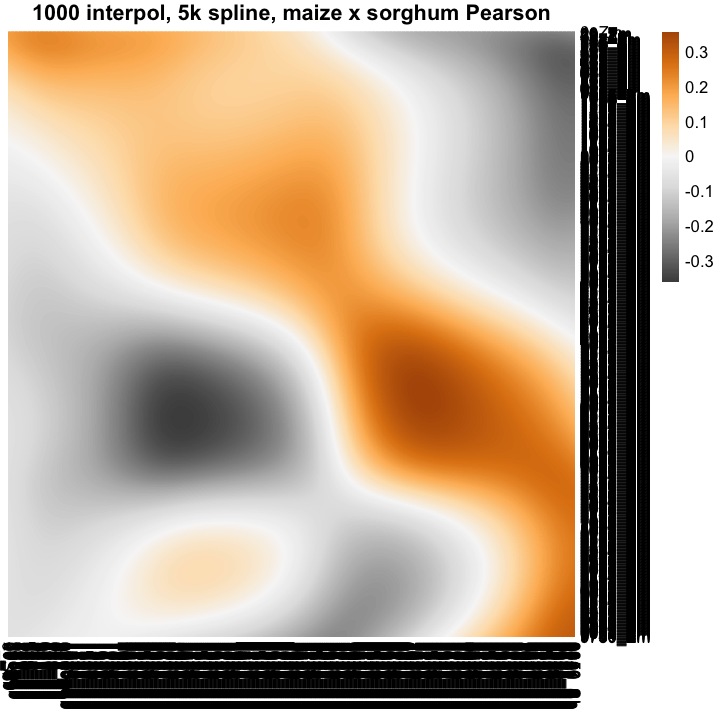

In [270]:
# draw interpol comparsion heatmap
require(pheatmap)
require(RColorBrewer)

interpolCor <- cor(x= full_B73, y= full_BTx623, use="na.or.complete", method= 'pearson')
interpolDists <- as.dist((1 - interpolCor))
interpolDistMatrix <- as.matrix( interpolDists )

# set square drawing space
options(repr.plot.width=6, repr.plot.height=6)

colors <- colorRampPalette( c("#4d4d4d","#878787","#bababa", #greys
                              "#e0e0e0","#f7f7f7","#fee0b6",
                              "#fdb863","#e08214","#b35806"))(200) #oranges



pheatmap(interpolCor,
         clustering_distance_rows = interpolDists,
         cluster_rows=F, cluster_cols=F,
         show_rownames = T, show_colnames = T,
         col = colors, border_color=NA,
         main="1000 interpol, 5k spline, maize x sorghum Pearson")


Is it an __inverse hourglass__?

In [271]:
#try coloring by K cluster

head(B73_factors); head(BTx623_factors)

K5_stage ETU  DAS
SHSL002_35_S35.count.txt 1        0.00 34 
SHSL002_36_S36.count.txt 1        0.00 33 
SHSL002_37_S37.count.txt 1        0.00 33 
SHSL002_33_S33.count.txt 1        0.04 34 
SHSL002_38_S38.count.txt 1        0.18 33 
SHSL002_40_S40.count.txt 1        0.39 32

K4_stage ETU  DAS panicle_height
SHSL001_47_S47.count.txt 1        0.00 61  0.359         
SHSL001_46_S46.count.txt 1        0.30 61  0.248         
SHSL001_45_S45.count.txt 1        0.59 61  0.972         
SHSL001_42_S42.count.txt 2        0.88 62  1.033         
SHSL001_43_S43.count.txt 2        1.21 62  1.386         
SHSL001_39_S39.count.txt 2        1.49 63  0.955

$`1`
[1]   0 830

$`2`
[1] 1530 2460

$`3`
[1] 2900 5370

$`4`
[1] 5570 7610

$`5`
[1] 7890 9750

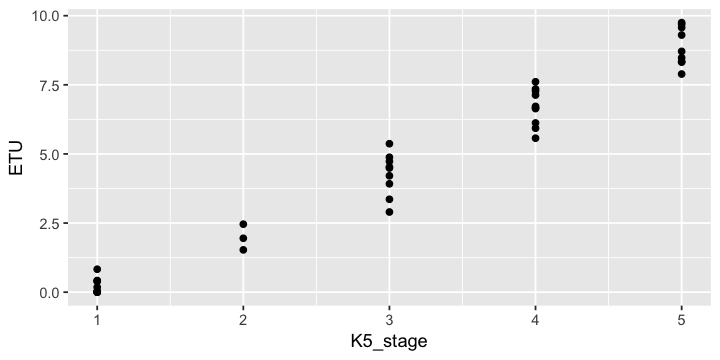

In [290]:
#how do you carve up ETU space?
options(repr.plot.width=6, repr.plot.height=3)
qplot(data=B73_factors, x=K5_stage, y=ETU) 
tapply(B73_factors$ETU*1000, B73_factors$K5_stage, range)

In [291]:
B73_ETUrange <- tapply(B73_factors$ETU*1000, B73_factors$K5_stage, range)

In [292]:
mean( c(max(B73_ETUrange$`1`), min(B73_ETUrange$`2`)) ) #0-1180
mean( c(max(B73_ETUrange$`2`), min(B73_ETUrange$`3`)) ) #1190-2680
mean( c(max(B73_ETUrange$`3`), min(B73_ETUrange$`4`)) ) #2690-5470
mean( c(max(B73_ETUrange$`4`), min(B73_ETUrange$`5`)) ) #5480-7750
#7760-end

[1] 1180

[1] 2680

[1] 5470

[1] 7750

In [289]:
colnames(full_B73)
# I = 0_Zm - 1181_Zm
# II = 1191_Zm - 2684_Zm
# III = 2694_Zm - 5475_Zm
# IV = 5485_Zm - 7749_Zm
# V = 7759_Zm - 9750_Zm

[1] "0_Zm"    "10_Zm"   "20_Zm"   "29_Zm"   "39_Zm"   "49_Zm"   "59_Zm"  
   [8] "68_Zm"   "78_Zm"   "88_Zm"   "98_Zm"   "107_Zm"  "117_Zm"  "127_Zm" 
  [15] "137_Zm"  "146_Zm"  "156_Zm"  "166_Zm"  "176_Zm"  "185_Zm"  "195_Zm" 
  [22] "205_Zm"  "215_Zm"  "224_Zm"  "234_Zm"  "244_Zm"  "254_Zm"  "264_Zm" 
  [29] "273_Zm"  "283_Zm"  "293_Zm"  "303_Zm"  "312_Zm"  "322_Zm"  "332_Zm" 
  [36] "342_Zm"  "351_Zm"  "361_Zm"  "371_Zm"  "381_Zm"  "390_Zm"  "400_Zm" 
  [43] "410_Zm"  "420_Zm"  "429_Zm"  "439_Zm"  "449_Zm"  "459_Zm"  "468_Zm" 
  [50] "478_Zm"  "488_Zm"  "498_Zm"  "508_Zm"  "517_Zm"  "527_Zm"  "537_Zm" 
  [57] "547_Zm"  "556_Zm"  "566_Zm"  "576_Zm"  "586_Zm"  "595_Zm"  "605_Zm" 
  [64] "615_Zm"  "625_Zm"  "634_Zm"  "644_Zm"  "654_Zm"  "664_Zm"  "673_Zm" 
  [71] "683_Zm"  "693_Zm"  "703_Zm"  "712_Zm"  "722_Zm"  "732_Zm"  "742_Zm" 
  [78] "752_Zm"  "761_Zm"  "771_Zm"  "781_Zm"  "791_Zm"  "800_Zm"  "810_Zm" 
  [85] "820_Zm"  "830_Zm"  "839_Zm"  "849_Zm"  "859_Zm"  "869_Zm"  "878_Zm" 
  [92] "888_Zm"  "898_Zm"  "908_Zm"  "917_Zm"  "927_Zm"  "937_Zm"  "947_Zm" 
  [99] "956_Zm"  "966_Zm"  "976_Zm"  "986_Zm"  "995_Zm"  "1005_Zm" "1015_Zm"
 [106] "1025_Zm" "1035_Zm" "1044_Zm" "1054_Zm" "1064_Zm" "1074_Zm" "1083_Zm"
 [113] "1093_Zm" "1103_Zm" "1113_Zm" "1122_Zm" "1132_Zm" "1142_Zm" "1152_Zm"
 [120] "1161_Zm" "1171_Zm" "1181_Zm" "1191_Zm" "1200_Zm" "1210_Zm" "1220_Zm"
 [127] "1230_Zm" "1239_Zm" "1249_Zm" "1259_Zm" "1269_Zm" "1279_Zm" "1288_Zm"
 [134] "1298_Zm" "1308_Zm" "1318_Zm" "1327_Zm" "1337_Zm" "1347_Zm" "1357_Zm"
 [141] "1366_Zm" "1376_Zm" "1386_Zm" "1396_Zm" "1405_Zm" "1415_Zm" "1425_Zm"
 [148] "1435_Zm" "1444_Zm" "1454_Zm" "1464_Zm" "1474_Zm" "1483_Zm" "1493_Zm"
 [155] "1503_Zm" "1513_Zm" "1523_Zm" "1532_Zm" "1542_Zm" "1552_Zm" "1562_Zm"
 [162] "1571_Zm" "1581_Zm" "1591_Zm" "1601_Zm" "1610_Zm" "1620_Zm" "1630_Zm"
 [169] "1640_Zm" "1649_Zm" "1659_Zm" "1669_Zm" "1679_Zm" "1688_Zm" "1698_Zm"
 [176] "1708_Zm" "1718_Zm" "1727_Zm" "1737_Zm" "1747_Zm" "1757_Zm" "1767_Zm"
 [183] "1776_Zm" "1786_Zm" "1796_Zm" "1806_Zm" "1815_Zm" "1825_Zm" "1835_Zm"
 [190] "1845_Zm" "1854_Zm" "1864_Zm" "1874_Zm" "1884_Zm" "1893_Zm" "1903_Zm"
 [197] "1913_Zm" "1923_Zm" "1932_Zm" "1942_Zm" "1952_Zm" "1962_Zm" "1971_Zm"
 [204] "1981_Zm" "1991_Zm" "2001_Zm" "2011_Zm" "2020_Zm" "2030_Zm" "2040_Zm"
 [211] "2050_Zm" "2059_Zm" "2069_Zm" "2079_Zm" "2089_Zm" "2098_Zm" "2108_Zm"
 [218] "2118_Zm" "2128_Zm" "2137_Zm" "2147_Zm" "2157_Zm" "2167_Zm" "2176_Zm"
 [225] "2186_Zm" "2196_Zm" "2206_Zm" "2215_Zm" "2225_Zm" "2235_Zm" "2245_Zm"
 [232] "2255_Zm" "2264_Zm" "2274_Zm" "2284_Zm" "2294_Zm" "2303_Zm" "2313_Zm"
 [239] "2323_Zm" "2333_Zm" "2342_Zm" "2352_Zm" "2362_Zm" "2372_Zm" "2381_Zm"
 [246] "2391_Zm" "2401_Zm" "2411_Zm" "2420_Zm" "2430_Zm" "2440_Zm" "2450_Zm"
 [253] "2459_Zm" "2469_Zm" "2479_Zm" "2489_Zm" "2498_Zm" "2508_Zm" "2518_Zm"
 [260] "2528_Zm" "2538_Zm" "2547_Zm" "2557_Zm" "2567_Zm" "2577_Zm" "2586_Zm"
 [267] "2596_Zm" "2606_Zm" "2616_Zm" "2625_Zm" "2635_Zm" "2645_Zm" "2655_Zm"
 [274] "2664_Zm" "2674_Zm" "2684_Zm" "2694_Zm" "2703_Zm" "2713_Zm" "2723_Zm"
 [281] "2733_Zm" "2742_Zm" "2752_Zm" "2762_Zm" "2772_Zm" "2782_Zm" "2791_Zm"
 [288] "2801_Zm" "2811_Zm" "2821_Zm" "2830_Zm" "2840_Zm" "2850_Zm" "2860_Zm"
 [295] "2869_Zm" "2879_Zm" "2889_Zm" "2899_Zm" "2908_Zm" "2918_Zm" "2928_Zm"
 [302] "2938_Zm" "2947_Zm" "2957_Zm" "2967_Zm" "2977_Zm" "2986_Zm" "2996_Zm"
 [309] "3006_Zm" "3016_Zm" "3026_Zm" "3035_Zm" "3045_Zm" "3055_Zm" "3065_Zm"
 [316] "3074_Zm" "3084_Zm" "3094_Zm" "3104_Zm" "3113_Zm" "3123_Zm" "3133_Zm"
 [323] "3143_Zm" "3152_Zm" "3162_Zm" "3172_Zm" "3182_Zm" "3191_Zm" "3201_Zm"
 [330] "3211_Zm" "3221_Zm" "3230_Zm" "3240_Zm" "3250_Zm" "3260_Zm" "3270_Zm"
 [337] "3279_Zm" "3289_Zm" "3299_Zm" "3309_Zm" "3318_Zm" "3328_Zm" "3338_Zm"
 [344] "3348_Zm" "3357_Zm" "3367_Zm" "3377_Zm" "3387_Zm" "3396_Zm" "3406_Zm"
 [351] "3416_Zm" "3426_Zm" "3435_Zm" "3445_Zm" "3455_Zm" "3465_Zm" "3474_Zm"
 [358] "3484_Zm" "3494_Zm" "3504_Zm" "3514_Zm" "3523_Zm" "3533_Zm" "3543_Zm"

In [296]:
## I = 0_Zm - 1181_Zm
# II = 1191_Zm - 2684_Zm
# III = 2694_Zm - 5475_Zm
# IV = 5485_Zm - 7749_Zm
# V = 7759_Zm - 9750_Zm
colnames(full_B73) %>% match("0_Zm",.)
colnames(full_B73) %>% match("1181_Zm",.)
colnames(full_B73) %>% match("1191_Zm",.)
colnames(full_B73) %>% match("2684_Zm",.)
colnames(full_B73) %>% match("2694_Zm",.)
colnames(full_B73) %>% match("5475_Zm",.)
colnames(full_B73) %>% match("5485_Zm",.)
colnames(full_B73) %>% match("7749_Zm",.)
colnames(full_B73) %>% match("7759_Zm",.)
colnames(full_B73) %>% match("9750_Zm",.)

[1] 1

[1] 122

[1] 123

[1] 276

[1] 277

[1] 562

[1] 563

[1] 795

[1] 796

[1] 1000

In [297]:
#create annotation df
B73_anno <- data.frame("ZmStage" = c(rep('I', 123), 
                                rep('II', 154), 
                                rep('III', 286), 
                                rep('IV', 233), 
                                rep('V', 204))
                       )
row.names(B73_anno) <- colnames(full_B73)
B73_anno %>% dim

[1] 1000    1

In [298]:
#now sorgs
BTx623_ETUrange <- tapply(BTx623_factors$ETU*1000, BTx623_factors$K4_stage, range)
BTx623_ETUrange

$`1`
[1]   0 590

$`2`
[1]  880 4510

$`3`
[1] 5160 8760

$`4`
[1] 9060 9850

In [299]:
mean( c(max(BTx623_ETUrange$`1`), min(BTx623_ETUrange$`2`)) ) #0-735
mean( c(max(BTx623_ETUrange$`2`), min(BTx623_ETUrange$`3`)) ) #8-48
mean( c(max(BTx623_ETUrange$`3`), min(BTx623_ETUrange$`4`)) ) #49-89
#90-100

[1] 735

[1] 4835

[1] 8910

In [300]:
colnames(full_BTx623)
#I = 0_Sb - 739_Sb
#II = 749_Sb - 4831_Sb
#III = 4841_Sb - 8913_Sb
#IV = 8923_Sb - 9850_Sb


[1] "0_Sb"    "10_Sb"   "20_Sb"   "30_Sb"   "39_Sb"   "49_Sb"   "59_Sb"  
   [8] "69_Sb"   "79_Sb"   "89_Sb"   "99_Sb"   "108_Sb"  "118_Sb"  "128_Sb" 
  [15] "138_Sb"  "148_Sb"  "158_Sb"  "168_Sb"  "177_Sb"  "187_Sb"  "197_Sb" 
  [22] "207_Sb"  "217_Sb"  "227_Sb"  "237_Sb"  "246_Sb"  "256_Sb"  "266_Sb" 
  [29] "276_Sb"  "286_Sb"  "296_Sb"  "306_Sb"  "316_Sb"  "325_Sb"  "335_Sb" 
  [36] "345_Sb"  "355_Sb"  "365_Sb"  "375_Sb"  "385_Sb"  "394_Sb"  "404_Sb" 
  [43] "414_Sb"  "424_Sb"  "434_Sb"  "444_Sb"  "454_Sb"  "463_Sb"  "473_Sb" 
  [50] "483_Sb"  "493_Sb"  "503_Sb"  "513_Sb"  "523_Sb"  "532_Sb"  "542_Sb" 
  [57] "552_Sb"  "562_Sb"  "572_Sb"  "582_Sb"  "592_Sb"  "601_Sb"  "611_Sb" 
  [64] "621_Sb"  "631_Sb"  "641_Sb"  "651_Sb"  "661_Sb"  "670_Sb"  "680_Sb" 
  [71] "690_Sb"  "700_Sb"  "710_Sb"  "720_Sb"  "730_Sb"  "739_Sb"  "749_Sb" 
  [78] "759_Sb"  "769_Sb"  "779_Sb"  "789_Sb"  "799_Sb"  "809_Sb"  "818_Sb" 
  [85] "828_Sb"  "838_Sb"  "848_Sb"  "858_Sb"  "868_Sb"  "878_Sb"  "887_Sb" 
  [92] "897_Sb"  "907_Sb"  "917_Sb"  "927_Sb"  "937_Sb"  "947_Sb"  "956_Sb" 
  [99] "966_Sb"  "976_Sb"  "986_Sb"  "996_Sb"  "1006_Sb" "1016_Sb" "1025_Sb"
 [106] "1035_Sb" "1045_Sb" "1055_Sb" "1065_Sb" "1075_Sb" "1085_Sb" "1094_Sb"
 [113] "1104_Sb" "1114_Sb" "1124_Sb" "1134_Sb" "1144_Sb" "1154_Sb" "1163_Sb"
 [120] "1173_Sb" "1183_Sb" "1193_Sb" "1203_Sb" "1213_Sb" "1223_Sb" "1232_Sb"
 [127] "1242_Sb" "1252_Sb" "1262_Sb" "1272_Sb" "1282_Sb" "1292_Sb" "1302_Sb"
 [134] "1311_Sb" "1321_Sb" "1331_Sb" "1341_Sb" "1351_Sb" "1361_Sb" "1371_Sb"
 [141] "1380_Sb" "1390_Sb" "1400_Sb" "1410_Sb" "1420_Sb" "1430_Sb" "1440_Sb"
 [148] "1449_Sb" "1459_Sb" "1469_Sb" "1479_Sb" "1489_Sb" "1499_Sb" "1509_Sb"
 [155] "1518_Sb" "1528_Sb" "1538_Sb" "1548_Sb" "1558_Sb" "1568_Sb" "1578_Sb"
 [162] "1587_Sb" "1597_Sb" "1607_Sb" "1617_Sb" "1627_Sb" "1637_Sb" "1647_Sb"
 [169] "1656_Sb" "1666_Sb" "1676_Sb" "1686_Sb" "1696_Sb" "1706_Sb" "1716_Sb"
 [176] "1725_Sb" "1735_Sb" "1745_Sb" "1755_Sb" "1765_Sb" "1775_Sb" "1785_Sb"
 [183] "1794_Sb" "1804_Sb" "1814_Sb" "1824_Sb" "1834_Sb" "1844_Sb" "1854_Sb"
 [190] "1864_Sb" "1873_Sb" "1883_Sb" "1893_Sb" "1903_Sb" "1913_Sb" "1923_Sb"
 [197] "1933_Sb" "1942_Sb" "1952_Sb" "1962_Sb" "1972_Sb" "1982_Sb" "1992_Sb"
 [204] "2002_Sb" "2011_Sb" "2021_Sb" "2031_Sb" "2041_Sb" "2051_Sb" "2061_Sb"
 [211] "2071_Sb" "2080_Sb" "2090_Sb" "2100_Sb" "2110_Sb" "2120_Sb" "2130_Sb"
 [218] "2140_Sb" "2149_Sb" "2159_Sb" "2169_Sb" "2179_Sb" "2189_Sb" "2199_Sb"
 [225] "2209_Sb" "2218_Sb" "2228_Sb" "2238_Sb" "2248_Sb" "2258_Sb" "2268_Sb"
 [232] "2278_Sb" "2287_Sb" "2297_Sb" "2307_Sb" "2317_Sb" "2327_Sb" "2337_Sb"
 [239] "2347_Sb" "2357_Sb" "2366_Sb" "2376_Sb" "2386_Sb" "2396_Sb" "2406_Sb"
 [246] "2416_Sb" "2426_Sb" "2435_Sb" "2445_Sb" "2455_Sb" "2465_Sb" "2475_Sb"
 [253] "2485_Sb" "2495_Sb" "2504_Sb" "2514_Sb" "2524_Sb" "2534_Sb" "2544_Sb"
 [260] "2554_Sb" "2564_Sb" "2573_Sb" "2583_Sb" "2593_Sb" "2603_Sb" "2613_Sb"
 [267] "2623_Sb" "2633_Sb" "2642_Sb" "2652_Sb" "2662_Sb" "2672_Sb" "2682_Sb"
 [274] "2692_Sb" "2702_Sb" "2711_Sb" "2721_Sb" "2731_Sb" "2741_Sb" "2751_Sb"
 [281] "2761_Sb" "2771_Sb" "2780_Sb" "2790_Sb" "2800_Sb" "2810_Sb" "2820_Sb"
 [288] "2830_Sb" "2840_Sb" "2849_Sb" "2859_Sb" "2869_Sb" "2879_Sb" "2889_Sb"
 [295] "2899_Sb" "2909_Sb" "2919_Sb" "2928_Sb" "2938_Sb" "2948_Sb" "2958_Sb"
 [302] "2968_Sb" "2978_Sb" "2988_Sb" "2997_Sb" "3007_Sb" "3017_Sb" "3027_Sb"
 [309] "3037_Sb" "3047_Sb" "3057_Sb" "3066_Sb" "3076_Sb" "3086_Sb" "3096_Sb"
 [316] "3106_Sb" "3116_Sb" "3126_Sb" "3135_Sb" "3145_Sb" "3155_Sb" "3165_Sb"
 [323] "3175_Sb" "3185_Sb" "3195_Sb" "3204_Sb" "3214_Sb" "3224_Sb" "3234_Sb"
 [330] "3244_Sb" "3254_Sb" "3264_Sb" "3273_Sb" "3283_Sb" "3293_Sb" "3303_Sb"
 [337] "3313_Sb" "3323_Sb" "3333_Sb" "3342_Sb" "3352_Sb" "3362_Sb" "3372_Sb"
 [344] "3382_Sb" "3392_Sb" "3402_Sb" "3412_Sb" "3421_Sb" "3431_Sb" "3441_Sb"
 [351] "3451_Sb" "3461_Sb" "3471_Sb" "3481_Sb" "3490_Sb" "3500_Sb" "3510_Sb"
 [358] "3520_Sb" "3530_Sb" "3540_Sb" "3550_Sb" "3559_Sb" "3569_Sb" "3579_Sb"

In [301]:
#I = 0_Sb - 739_Sb
#II = 749_Sb - 4831_Sb
#III = 4841_Sb - 8913_Sb
#IV = 8923_Sb - 9850_Sb

colnames(full_BTx623) %>% match("0_Sb",.)
colnames(full_BTx623) %>% match("749_Sb",.)
colnames(full_BTx623) %>% match("4841_Sb",.)
colnames(full_BTx623) %>% match("8923_Sb",.)

[1] 1

[1] 77

[1] 492

[1] 906

In [302]:
#create annotation df
BTx623_anno <- data.frame("SbStage" = c(rep('I', 77), 
                                rep('II', 415), 
                                rep('III', 414), 
                                rep('IV', 94))
                       )
row.names(BTx623_anno) <- colnames(full_BTx623)
BTx623_anno %>% dim

[1] 1000    1

In [303]:
# set annotation colors

ann_colors <- list(ZmStage = c(I = '#eff3ff', 
                               II = '#bdd7e7', 
                               III = '#6baed6', 
                               IV = '#3182bd', 
                               V = '#08519c'),
                    SbStage = c(I = '#f2f0f7', 
                                II = '#cbc9e2', 
                                III = '#9e9ac8', 
                                IV = '#6a51a3')
                   )

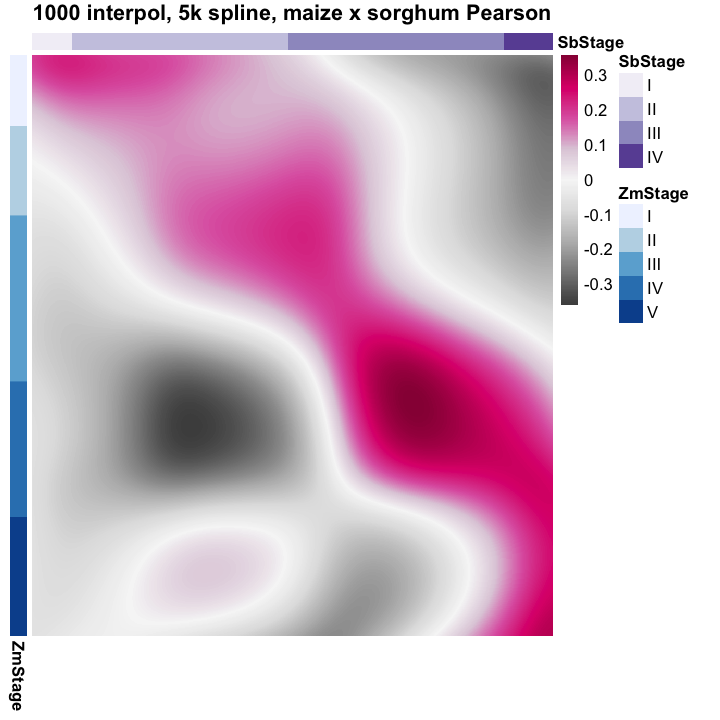

In [304]:
# draw interpol comparsion heatmap
require(pheatmap)
require(RColorBrewer)

interpolCor <- cor(x= full_B73, y= full_BTx623, use="na.or.complete", method= 'pearson')
interpolDists <- as.dist((1 - interpolCor))
interpolDistMatrix <- as.matrix( interpolDists )

# set square drawing space
options(repr.plot.width=6, repr.plot.height=6)

colors <- colorRampPalette( c("#4d4d4d","#878787","#bababa", #greys
                              "#e0e0e0","#f7f7f7","#e0cedc",
                              "#df65b0","#dd1c77","#980043"))(200) #magentas

pheatmap(interpolCor,
         clustering_distance_rows = interpolDists,
         cluster_rows=F, cluster_cols=F,
         show_rownames = F, show_colnames = F,
         col = colors, border_color=NA,
         annotation_colors = ann_colors,
         annotation_col = BTx623_anno, annotation_names_col = T,
         annotation_row = B73_anno, annotation_names_row = T,
         main="1000 interpol, 5k spline, maize x sorghum Pearson")


In [305]:
# looking fierce!
# save as PDF and SVG

# draw interpol comparsion heatmap
require(pheatmap)
require(RColorBrewer)

pdf(file="./MaizexSorghum_pearson_1000interpol_stgAnno.pdf", he=5, wi=5)
pheatmap(interpolCor,
         clustering_distance_rows = interpolDists,
         cluster_rows=F, cluster_cols=F,
         show_rownames = F, show_colnames = F,
         col = colors, border_color=NA,
         annotation_colors = ann_colors,
         annotation_col = BTx623_anno, annotation_names_col = T,
         annotation_row = B73_anno, annotation_names_row = T,
         main="1000 interpol, 5k spline, maize x sorghum Pearson")

dev.off()

svg(file="./MaizexSorghum_pearson_1000interpol_stgAnno.svg", he=5, wi=5)
pheatmap(interpolCor,
         clustering_distance_rows = interpolDists,
         cluster_rows=F, cluster_cols=F,
         show_rownames = F, show_colnames = F,
         col = colors, border_color=NA,
         annotation_colors = ann_colors,
         annotation_col = BTx623_anno, annotation_names_col = T,
         annotation_row = B73_anno, annotation_names_row = T,
         main="1000 interpol, 5k spline, maize x sorghum Pearson")

dev.off()

tiff(file="./MaizexSorghum_pearson_1000interpol_stgAnno.tiff", he=5, wi=5, pointsize = 1/300, units = 'in', res = 300)
pheatmap(interpolCor,
         clustering_distance_rows = interpolDists,
         cluster_rows=F, cluster_cols=F,
         show_rownames = F, show_colnames = F,
         col = colors, border_color=NA,
         annotation_colors = ann_colors,
         annotation_col = BTx623_anno, annotation_names_col = T,
         annotation_row = B73_anno, annotation_names_row = T,
         main="1000 interpol, 5k spline, maize x sorghum Pearson")

dev.off()


pdf 
  2

pdf 
  2

pdf 
  2

# Try the Yanai et al. method: 
To generate the phasegrams shown in Fig. 2 <br>
we first standardized the log10 profiles <br>
by subtracting the mean and dividing by <br>
the standard deviation. We next computed <br>
the first two principal components of this <br>
expression data; since the profiles were <br>
standardized, the genes form a circle. <br>
The genes are then sorted according to <br>
their angle from the origin in this space. <br>
A gene expression profile was mapped to a <br>
temporal phase (early, transition, or late) <br>
by computing the correlation with the three <br>
idealized profiles shown in Extended Data <br>
Fig. 5 and assigning it to the pattern <br>
exhibiting the highest correlation and thus <br>
best match.

In [32]:
##B73

require(magrittr)
object <- tsplineB73.RN
head(object)

pca <- object %>% prcomp(., rank.=2) 



X0          X0.0984848484848485 X0.196969696969697
AC148152.3_FG005 -1.31780236 -1.14619364         -0.98954081       
AC148152.3_FG008 -1.02184125 -0.98873954         -0.95545277       
AC148167.6_FG001  0.06882208 -0.11794131         -0.28847178       
AC149475.2_FG002 -0.01283637  0.03300919          0.06938911       
AC149475.2_FG003  0.30386280  0.43559605          0.55469601       
AC149475.2_FG005 -0.15567665 -0.11989266         -0.09063397       
                 X0.295454545454545 X0.393939393939394 X0.492424242424242
AC148152.3_FG005 -0.84719957        -0.71852563        -0.60287468       
AC148152.3_FG008 -0.92204787        -0.88859174        -0.85515129       
AC148167.6_FG001 -0.44332644        -0.58306239        -0.70823672       
AC149475.2_FG002  0.09677151         0.11562451         0.12641624       
AC149475.2_FG003  0.66159569         0.75672813         0.84052634       
AC149475.2_FG005 -0.06750855        -0.05012439        -0.03808946       
                 X0.590909090909091 X0.689393939393939 X0.787878787878788
AC148152.3_FG005 -0.49960244        -0.40806462        -0.32761692       
AC148152.3_FG008 -0.82179343        -0.78858508        -0.75559315       
AC148167.6_FG001 -0.81940653        -0.91712892        -1.00196100       
AC149475.2_FG002  0.12961480         0.12568833         0.11510494       
AC149475.2_FG003  0.91342336         0.97585221         1.02824591       
AC149475.2_FG005 -0.03101176        -0.02849925        -0.03015993       
                 X0.886363636363636 ⋯ X8.86363636363636 X8.96212121212121
AC148152.3_FG005 -0.25761505        ⋯ -0.4908815        -0.4711625       
AC148152.3_FG008 -0.72288454        ⋯  1.3362021         1.4140900       
AC148167.6_FG001 -1.07445985        ⋯  0.3263387         0.2409997       
AC149475.2_FG002  0.09833275        ⋯  0.7670590         0.7392698       
AC149475.2_FG003  1.07103749        ⋯ -0.1803666        -0.2208128       
AC149475.2_FG005 -0.03560177        ⋯ -1.0465719        -1.0812460       
                 X9.06060606060606 X9.15909090909091 X9.25757575757576
AC148152.3_FG005 -0.4371927        -0.38804319       -0.3227850       
AC148152.3_FG008  1.4922773         1.57063583        1.6490372       
AC148167.6_FG001  0.1469549         0.04387009       -0.0685890       
AC149475.2_FG002  0.7054898         0.66551341        0.6191350       
AC149475.2_FG003 -0.2695893        -0.32716259       -0.3939992       
AC149475.2_FG005 -1.1049653        -1.11689181       -1.1161874       
                 X9.35606060606061 X9.45454545454545 X9.5530303030303
AC148152.3_FG005 -0.2404894        -0.1402273        -0.02106987     
AC148152.3_FG008  1.7273530         1.8054550         1.88321476     
AC148167.6_FG001 -0.1907565        -0.3229667        -0.46555376     
AC149475.2_FG002  0.5661489         0.5063495         0.43953130     
AC149475.2_FG003 -0.4705657        -0.5573284        -0.65475382     
AC149475.2_FG005 -1.1020138        -1.0735331        -1.02990705     
                 X9.65151515151515 X9.75     
AC148152.3_FG005  0.1179117         0.2776464
AC148152.3_FG008  1.9605041         2.0371946
AC148167.6_FG001 -0.6188519        -0.7831952
AC149475.2_FG002  0.3654886         0.2840157
AC149475.2_FG003 -0.7633085        -0.8834589
AC149475.2_FG005 -0.9702976        -0.8938666

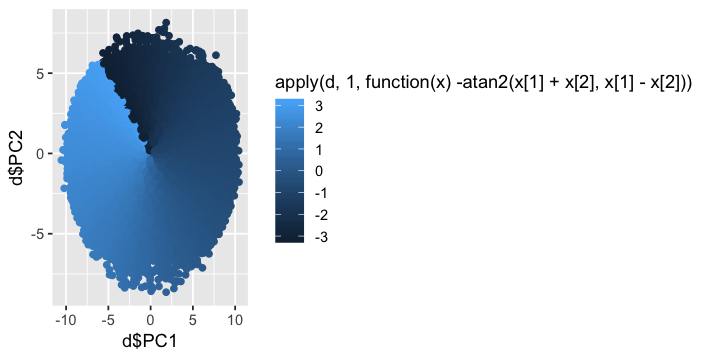

In [33]:
require(ggplot2)

d <- data.frame(PC1=pca$x[,1], PC2=pca$x[,2])

options(repr.plot.width=6, repr.plot.height=3)
qplot(x=d$PC1, y=d$PC2, color=apply(d, 1, function(x) -atan2(x[1]+x[2],x[1]-x[2])))


AC148152.3_FG005 AC148152.3_FG008 AC148167.6_FG001 AC149475.2_FG002 
       0.7934681        2.4703081        1.8260993        2.9424862 
AC149475.2_FG003 AC149475.2_FG005 
      -1.3512880        0.4236540

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


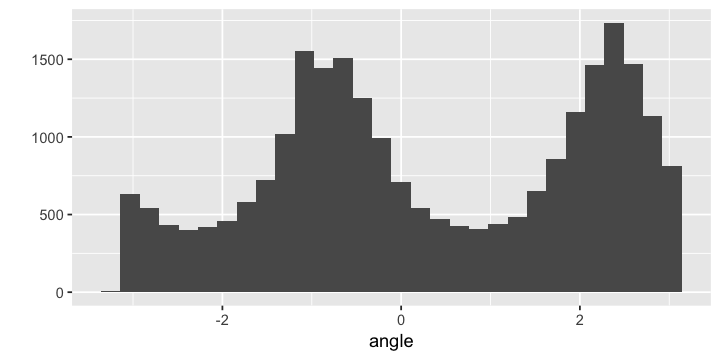

In [34]:
angle <- apply(d, 1, function(x) -atan2(x[1]+x[2],x[1]-x[2]))
head (angle)
qplot(angle)

In [35]:
require (magrittr)

object.ordered <- angle %>% 
                order %>%
                {angle[.]} %>%
                data.frame %>%
                rownames %>%
                {object[.,]} 
head(object.ordered)



X0         X0.0984848484848485 X0.196969696969697
GRMZM2G118355 0.35811531 0.25289604          0.15843403        
GRMZM2G552956 1.11757659 0.91606905          0.72922177        
GRMZM2G061626 1.33109389 1.07232333          0.83467816        
GRMZM2G065292 1.12923842 0.92575712          0.73735246        
GRMZM2G353147 0.02678928 0.01817617          0.01037377        
GRMZM2G026910 1.05484022 0.85082424          0.66228467        
              X0.295454545454545 X0.393939393939394 X0.492424242424242
GRMZM2G118355 0.074228497        -0.0002213388      -0.065416255      
GRMZM2G552956 0.556540852         0.3975323919       0.251702498      
GRMZM2G061626 0.617358815         0.4195657161       0.240499301      
GRMZM2G065292 0.563484419         0.4036129926       0.257198171      
GRMZM2G353147 0.003334844        -0.0029878106      -0.008641412      
GRMZM2G026910 0.488634942         0.3292884951       0.183658767      
              X0.590909090909091 X0.689393939393939 X0.787878787878788
GRMZM2G118355 -0.12185703        -0.170044450       -0.21047929       
GRMZM2G552956  0.11855728        -0.002397171       -0.11165474       
GRMZM2G061626  0.07936000        -0.064651751       -0.19233552       
GRMZM2G065292  0.12369995         0.002578309       -0.10670675       
GRMZM2G353147 -0.01367318        -0.018130320       -0.02206006       
GRMZM2G026910  0.05115920        -0.068796780       -0.17679572       
              X0.886363636363636 ⋯ X8.86363636363636 X8.96212121212121
GRMZM2G118355 -0.24366232        ⋯ 1.30195451        1.3003768        
GRMZM2G552956 -0.20970932        ⋯ 0.06386704        0.1284000        
GRMZM2G061626 -0.30449088        ⋯ 0.48280869        0.4596549        
GRMZM2G065292 -0.20469524        ⋯ 0.55265410        0.5589289        
GRMZM2G353147 -0.02550961        ⋯ 0.36899670        0.3731976        
GRMZM2G026910 -0.27342420        ⋯ 1.24957856        1.3077708        
              X9.06060606060606 X9.15909090909091 X9.25757575757576
GRMZM2G118355 1.2832264         1.2494882         1.1981473        
GRMZM2G552956 0.1994137         0.2771903         0.3620117        
GRMZM2G061626 0.4260815         0.3814551         0.3251424        
GRMZM2G065292 0.5592731         0.5533063         0.5406483        
GRMZM2G353147 0.3740564         0.3713534         0.3648691        
GRMZM2G026910 1.3594210         1.4040021         1.4409870        
              X9.35606060606061 X9.45454545454545 X9.5530303030303
GRMZM2G118355 1.1281885         1.0385968         0.9283572       
GRMZM2G552956 0.4541602         0.5539177         0.6615663       
GRMZM2G061626 0.2565100         0.1749245         0.0797526       
GRMZM2G065292 0.5209186         0.4937369         0.4587230       
GRMZM2G353147 0.3543837         0.3396776         0.3205312       
GRMZM2G026910 1.4698487         1.4900602         1.5010945       
              X9.65151515151515 X9.75     
GRMZM2G118355  0.79645460        0.6418739
GRMZM2G552956  0.77738804        0.9016651
GRMZM2G061626 -0.02963918       -0.1538842
GRMZM2G065292  0.41549643        0.3636769
GRMZM2G353147  0.29672478        0.2680387
GRMZM2G026910  1.50242436        1.4935229

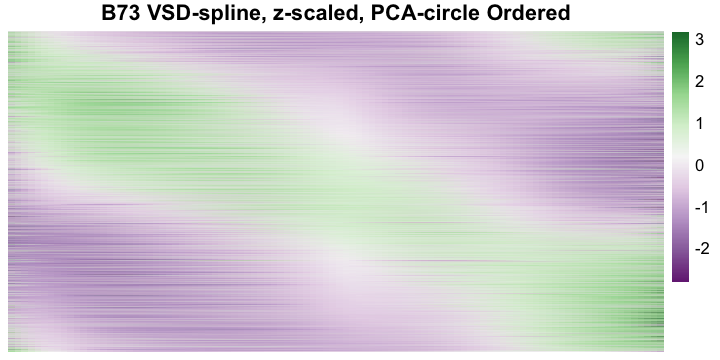

In [36]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="./B73_phasigram.pdf", he=6, wi=3)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [37]:
#add annotation for KN1 -- GRMZM2G017087
#then generalize

#pheatmap annotation is list of annotations for all row/column values
#my strat will be to take rownames, check against input list
#match input list, unchanged
#not matching input list, turn to ""
#then plot with annotation

In [38]:
to.annotate <- read.table(text="GID	name
GRMZM2G307119	BD1
GRMZM2G160917	UB2
GRMZM2G460544	UB3
GRMZM2G003927	RA1
AC233943.1_FG002	RA2
GRMZM2G014729	RA3
GRMZM2G307588	TSH4
GRMZM2G160565	BDE1/ZAG3
GRMZM2G110242	WAB1/BAD1
GRMZM2G036297	LG1
GRMZM2G060216	LG2
GRMZM2G133331	FEA4
GRMZM2G300133	TD1
GRMZM2G005624 	GT1
GRMZM2G325850	TSH1
GRMZM2G017087	KN1", sep="\t", header=T)

require(magrittr)

#object from above
anno <- rep("", length(rownames(object.ordered)))

rep.df <- to.annotate$GID %>%
    {match(., rownames(object.ordered))} %>%
    {data.frame(index=., text=to.annotate$name)}

for (row in (1:nrow(rep.df))) {
    anno [ rep.df[row, 1] ] <- rep.df[row, 2] %>% as.character()
}

rep.df
rep.df[row, 1]
rep.df[row, 2]
anno[10550:10560]

dim(object.ordered)
length(anno)


index text     
1  13753 BD1      
2   5989 UB2      
3   4751 UB3      
4  11663 RA1      
5   9504 RA2      
6   7928 RA3      
7   5114 TSH4     
8  19766 BDE1/ZAG3
9   7165 WAB1/BAD1
10  3726 LG1      
11  2255 LG2      
12  8627 FEA4     
13 12830 TD1      
14    NA GT1      
15  6508 TSH1     
16 10552 KN1

[1] 10552

[1] KN1
16 Levels: BD1 BDE1/ZAG3 FEA4 GT1 KN1 LG1 LG2 RA1 RA2 RA3 TD1 TSH1 TSH4 ... WAB1/BAD1

[1] ""    ""    "KN1" ""    ""    ""    ""    ""    ""    ""    ""

[1] 24727   100

[1] 24727

In [39]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

#options(repr.plot.width=3, repr.plot.height=6)
pdf(file="./B73_phasigram_label3.pdf", he=14, wi=5)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         main="B73 VSD-spline, z-scaled, PCA-circle Ordered")
dev.off()

pdf 
  2

In [40]:
##BTx623

require(magrittr)
object <- tsplineBTx623.RN
head(object)

pca <- object %>% prcomp(., rank.=2) 



X0           X0.0994949494949495 X0.198989898989899
Sobic.001G000100  0.005344583 -0.10285320         -0.20084495       
Sobic.001G000200 -0.294728438 -0.30902434         -0.32259347       
Sobic.001G000400  0.088833902  0.05370384          0.01824639       
Sobic.001G000700 -0.915124117 -0.82531986         -0.74470849       
Sobic.001G000800 -1.632655125 -1.38202921         -1.15258269       
Sobic.001G000900  1.363670005  1.21186231          1.07031415       
                 X0.298484848484848 X0.397979797979798 X0.497474747474748
Sobic.001G000100 -0.28900432        -0.36770496        -0.43732055       
Sobic.001G000200 -0.33545469        -0.34762684        -0.35912880       
Sobic.001G000400 -0.01742973        -0.05321583        -0.08900319       
Sobic.001G000700 -0.67290515        -0.60952493        -0.55418297       
Sobic.001G000800 -0.94353175        -0.75409262        -0.58348148       
Sobic.001G000900  0.93868778         0.81664544         0.70384940       
                 X0.596969696969697 X0.696464646464646 X0.795959595959596
Sobic.001G000100 -0.4982247         -0.5507912         -0.5953936        
Sobic.001G000200 -0.3699794         -0.3801975         -0.3898021        
Sobic.001G000400 -0.1246831         -0.1601469         -0.1952858        
Sobic.001G000700 -0.5064944         -0.4660743         -0.4325377        
Sobic.001G000800 -0.4309145         -0.2956080         -0.1767781        
Sobic.001G000900  0.5999619          0.5046452          0.4175615        
                 X0.895454545454546 ⋯ X8.95454545454546 X9.0540404040404
Sobic.001G000100 -0.63240551        ⋯  0.3111356         0.2878152      
Sobic.001G000200 -0.39881180        ⋯  0.9525857         0.9222423      
Sobic.001G000400 -0.22999116        ⋯  0.3646271         0.3422278      
Sobic.001G000700 -0.40549994        ⋯  1.0251702         0.9908758      
Sobic.001G000800 -0.07364095        ⋯  0.5458833         0.4956665      
Sobic.001G000900  0.33837312        ⋯ -0.2007129        -0.2121095      
                 X9.15353535353535 X9.2530303030303 X9.35252525252525
Sobic.001G000100  0.2613000         0.2314461        0.1981096       
Sobic.001G000200  0.8821738         0.8318745        0.7708384       
Sobic.001G000400  0.3184779         0.2934172        0.2670856       
Sobic.001G000700  0.9477588         0.8954222        0.8334687       
Sobic.001G000800  0.4366063         0.3683101        0.2903855       
Sobic.001G000900 -0.2238758        -0.2360174       -0.2485399       
                 X9.4520202020202 X9.55151515151515 X9.6510101010101
Sobic.001G000100  0.1611466        0.1204132         0.075765457    
Sobic.001G000200  0.6985597        0.6145324         0.518250820    
Sobic.001G000400  0.2395228        0.2107688         0.180863474    
Sobic.001G000700  0.7615012        0.6791226         0.585935687    
Sobic.001G000800  0.2024399        0.1040809        -0.005084207    
Sobic.001G000900 -0.2614488       -0.2747498        -0.288448499    
                 X9.75050505050505 X9.85      
Sobic.001G000100  0.02705945       -0.02584873
Sobic.001G000200  0.40920893        0.28690090
Sobic.001G000400  0.14984657        0.11775798
Sobic.001G000700  0.48154338        0.36554850
Sobic.001G000800 -0.12544780       -0.25740244
Sobic.001G000900 -0.30255041       -0.31706117

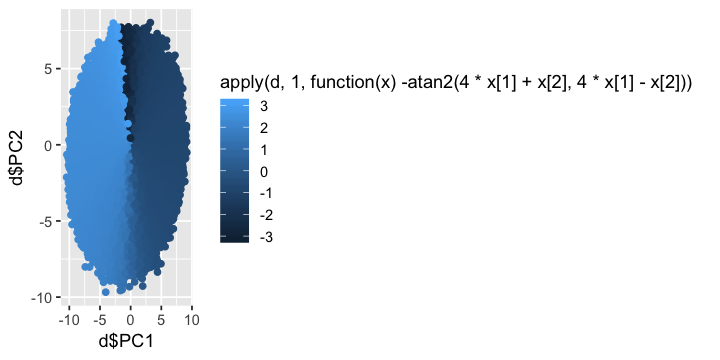

In [41]:
require(ggplot2)

d <- data.frame(PC1=pca$x[,1], PC2=pca$x[,2])

options(repr.plot.width=6, repr.plot.height=3)
qplot(x=d$PC1, y=d$PC2, color=apply(d, 1, function(x) -atan2(4*x[1]+x[2],4*x[1]-x[2])))


Sobic.001G000100 Sobic.001G000200 Sobic.001G000400 Sobic.001G000700 
       2.3345549        2.4670133        2.4760092        2.4571027 
Sobic.001G000800 Sobic.001G000900 
       2.3587695       -0.9952643

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


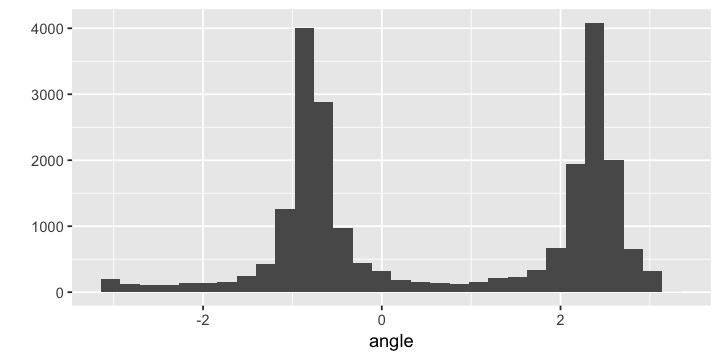

In [42]:
angle <- apply(d, 1, function(x) -atan2(4*x[1]+x[2],4*x[1]-x[2]))
head (angle)
qplot(angle)

In [43]:
require (magrittr)

object.ordered <- angle %>% 
                order %>%
                {angle[.]} %>%
                data.frame %>%
                rownames %>%
                {object[.,]} 
head(object.ordered)



X0         X0.0994949494949495 X0.198989898989899
Sobic.001G541400 0.07944787 0.1551701           0.2205703         
Sobic.003G113200 0.53799415 0.5605726           0.5753490         
Sobic.010G097100 0.41935069 0.4847860           0.5373155         
Sobic.005G005000 0.10072775 0.1984408           0.2813901         
Sobic.003G274600 1.86818928 1.6160496           1.3821958         
Sobic.001G073150 1.52989305 1.3528598           1.1852412         
                 X0.298484848484848 X0.397979797979798 X0.497474747474748
Sobic.001G541400 0.2760949          0.3221907          0.3593043         
Sobic.003G113200 0.5827298          0.5831212          0.5769296         
Sobic.010G097100 0.5775684          0.6061742          0.6237622         
Sobic.005G005000 0.3502742          0.4057915          0.4486404         
Sobic.003G274600 1.1659741          0.9667302          0.7838102         
Sobic.001G073150 1.0268086          0.8773334          0.7365870         
                 X0.596969696969697 X0.696464646464646 X0.795959595959596
Sobic.001G541400 0.3878824          0.4083716          0.4212187         
Sobic.003G113200 0.5645612          0.5464224          0.5229194         
Sobic.010G097100 0.6309616          0.6284017          0.6167120         
Sobic.005G005000 0.4795193          0.4991267          0.5081611         
Sobic.003G274600 0.6165600          0.4643255          0.3264527         
Sobic.001G073150 0.6043409          0.4803663          0.3644346         
                 X0.895454545454546 ⋯ X8.95454545454546 X9.0540404040404
Sobic.001G541400 0.4268702          ⋯  0.45661979        0.6060216      
Sobic.003G113200 0.4944586          ⋯  0.21337780        0.1616941      
Sobic.010G097100 0.5965217          ⋯  0.30715551        0.3332567      
Sobic.005G005000 0.5073208          ⋯ -0.09404458       -0.1173462      
Sobic.003G274600 0.2022876          ⋯  0.75536105        0.8264904      
Sobic.001G073150 0.2563174          ⋯  0.13783817        0.1813089      
                 X9.15353535353535 X9.2530303030303 X9.35252525252525
Sobic.001G541400  0.7703984         0.95043856       1.14683041      
Sobic.003G113200  0.1045232         0.04171259      -0.02689014      
Sobic.010G097100  0.3634181         0.39795389       0.43717844      
Sobic.005G005000 -0.1385185        -0.15727043      -0.17331052      
Sobic.003G274600  0.8983085         0.97070607       1.04357398      
Sobic.001G073150  0.2311993         0.28787680       0.35170885      
                 X9.4520202020202 X9.55151515151515 X9.6510101010101
Sobic.001G541400  1.3602623        1.5914227         1.8410000      
Sobic.003G113200 -0.1014375       -0.1820819        -0.2689760      
Sobic.010G097100  0.4814060        0.5309509         0.5861274      
Sobic.005G005000 -0.1863475       -0.1960901        -0.2022470      
Sobic.003G274600  1.1168031        1.1902842         1.2639082      
Sobic.001G073150  0.4230628        0.5023061         0.5898061      
                 X9.75050505050505 X9.85     
Sobic.001G541400  2.1096825         2.3981585
Sobic.003G113200 -0.3622721        -0.4621227
Sobic.010G097100  0.6472497         0.7146323
Sobic.005G005000 -0.2045268        -0.2026383
Sobic.003G274600  1.3375659         1.4111482
Sobic.001G073150  0.6859302         0.7910458

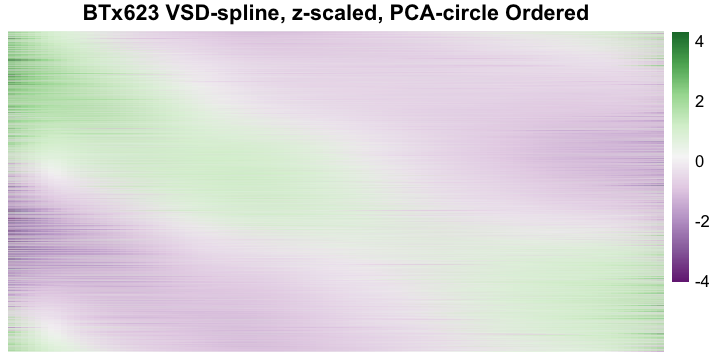

In [44]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

options(repr.plot.width=6, repr.plot.height=3)
#pdf(file="./BTx623_phasigram.pdf", he=6, wi=3)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")
#dev.off()

In [45]:
to.annotate <- read.table(text="GID	name
Sobic.002G411000	SbBD1
Sobic.007G210200	SbUB2
Sobic.007G210200	SbUB3
Sobic.002G197700	SbRA1
Sobic.003G052900	SbRA2
Sobic.002G381600	SbRA3
Sobic.002G247800	SbTSH4
Sobic.004G281000	SbBDE1/ZAG3
Sobic.002G198400	SbWAB1/BAD1
Sobic.006G247700	SbLG1
Sobic.003G363600	SbLG2
Sobic.010G110100	SbFEA4
Sobic.010G267700	SbTD1
Sobic.001G468400	SbGT1
Sobic.009G243600	SbTSH1
Sobic.001G106200	SbKN1", sep="\t", header=T)

require(magrittr)

#object from above
anno <- rep("", length(rownames(object.ordered)))

rep.df <- to.annotate$GID %>%
    {match(., rownames(object.ordered))} %>%
    {data.frame(index=., text=to.annotate$name)}

for (row in (1:nrow(rep.df))) {
    anno [ rep.df[row, 1] ] <- rep.df[row, 2] %>% as.character()
}


In [46]:
require(pheatmap)
require(RColorBrewer)

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)

#options(repr.plot.width=3, repr.plot.height=6)
pdf(file="./BTx623_phasigram_label.pdf", he=14, wi=5)
pheatmap(object.ordered,
         cluster_rows=FALSE, cluster_cols=FALSE,
         show_rownames = T, show_colnames = F,
         col = colors,
         labels_row = anno,
         main="BTx623 VSD-spline, z-scaled, PCA-circle Ordered")
dev.off()

pdf 
  2

In [47]:
#try some dynamic time warping
#not sure how to fork my notebook...
#will duplecate a lot of code below, from previous attempts

#general flow
#create maize-centered list of sb orthologs (don't really care about sub genome)
#slice out z-scaled expression values for each maize-sorghum gene pair
#run dtw
#build DF of maize ID, sorghum ID, dtw




In [48]:
#using scaled, transposed matrix from above
require(magrittr)

maize_genes <- tsplineB73.RN %>%
                rownames() 
sorghum_genes <- tsplineBTx623.RN %>%
                rownames() 


length(maize_genes)
length(sorghum_genes)

[1] 24727

[1] 22755

In [49]:
#using orthology matrix, orth from above
#create maize1 and maize2 subsets of orthology table
maize1 <- orth[(orth$maize1!="No Gene"),]
maize2 <- orth[(orth$maize2!="No Gene"),]
dim(maize1)
dim(maize2)
#remember, some maize genes match multiple sorghum genes-- will this be a problem?

[1] 16965    10

[1] 10891    10

In [50]:
maize1_orth <- maize_genes %>% 
      match(. , orth$maize1) %>%
      orth[.,] #find maize nonNAs
SB_ZM1 <- data.frame(SB = maize1_orth$sorghum2, ZM = maize1_orth$maize1) %>% na.omit ()
head(SB_ZM1)

'GRMZM2G060216' %in% maize_genes
'GRMZM2G060216' %in% orth$maize1
'GRMZM2G060216' %in% SB_ZM1$ZM


SB               ZM           
909 Sobic.005G058900 GRMZM2G000014
910 Sobic.006G219600 GRMZM2G000039
911 Sobic.006G220200 GRMZM2G000052
913 Sobic.006G240300 GRMZM2G000093
914 Sobic.006G027200 GRMZM2G000114
915 Sobic.002G001700 GRMZM2G000126

[1] TRUE

[1] TRUE

[1] TRUE

In [51]:
maize2_orth <- maize_genes %>% 
      match(. , orth$maize2) %>%
      orth[.,] #find maize orthologs
SB_ZM2 <- data.frame(SB = maize2_orth$sorghum2, ZM = maize2_orth$maize2) %>% na.omit ()
head(SB_ZM2)

SB               ZM           
912 Sobic.008G081800 GRMZM2G000076
917 Sobic.010G052700 GRMZM2G000158
919 Sobic.003G240700 GRMZM2G000177
920 Sobic.001G351800 GRMZM2G000209
921 Sobic.001G352200 GRMZM2G000219
924 Sobic.006G137600 GRMZM2G000245

In [52]:
dim(SB_ZM1)
dim(SB_ZM2)
SB_ZM <- rbind(SB_ZM1, SB_ZM2)
dim(SB_ZM)

[1] 11879     2

[1] 7298    2

[1] 19177     2

In [53]:
length(maize_genes)
#index <- 920
#maize_genes[index]

#maize_gene <- index %>%
#{maize_genes[.]} 
#maize_gene <- 'GRMZM2G017087' #kn1
maize_gene <- 'GRMZM2G014729' #ra3
#maize_gene <- 'GRMZM2G005624' #gt1

#match(maize_gene , SB_ZM$ZM)

sorghum_gene <- maize_gene %>%
match(. , SB_ZM$ZM) %>%
SB_ZM$SB[.] %>% 
as.character()

print(maize_gene)
print(sorghum_gene)

ZM_slice <- tsplineB73.RN[maize_gene,]
colnames(ZM_slice) <- c(1:100)
SB_slice <- tsplineBTx623.RN[sorghum_gene,]
colnames(SB_slice) <- c(1:100)

ZM_slice
SB_slice

#try running dtw for first orthogroup
require(dtw)

dtw.test <- dtw(t(ZM_slice), t(SB_slice), keep=T, 
                open.end=T, open.begin=T, step.pattern=asymmetric)

#options(repr.plot.width=3, repr.plot.height=3)
pdf(file="./DTW_RA3.pdf", he=3, wi=3)
plot(dtw.test, type="twoway", offset=-1, lwd=2)
dev.off()
dtw.test
dtw.test$distance
dtw.test$normalizedDistance

[1] 24727

[1] "GRMZM2G014729"
[1] "Sobic.002G381600"


1          2          3          4          5         6      
GRMZM2G014729 -0.8876038 -0.5961473 -0.3226556 -0.0666897 0.1721892 0.39442
              7         8         9         10      ⋯ 91        92        
GRMZM2G014729 0.6004416 0.7906928 0.9656126 1.12564 ⋯ -0.379704 -0.3976882
              93        94        95         96         97         98       
GRMZM2G014729 -0.423414 -0.457477 -0.5004732 -0.5529984 -0.6156484 -0.689019
              99         100       
GRMZM2G014729 -0.7737061 -0.8703054

1       2         3           4         5          6         
Sobic.002G381600 0.28445 0.1163295 -0.03789946 -0.178731 -0.3066591 -0.4221778
                 7          8          9          10         ⋯ 91      
Sobic.002G381600 -0.5257813 -0.6179636 -0.6992187 -0.7700407 ⋯ 1.122035
                 92       93       94       95       96       97       98      
Sobic.002G381600 1.181905 1.242489 1.303744 1.365626 1.428092 1.491096 1.554596
                 99       100     
Sobic.002G381600 1.618548 1.682907

Loading required package: dtw
Loading required package: proxy

Attaching package: ‘proxy’

The following object is masked from ‘package:DelayedArray’:

    as.matrix

The following object is masked from ‘package:IRanges’:

    as.matrix

The following object is masked from ‘package:S4Vectors’:

    as.matrix

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix

Loaded dtw v1.18-1. See ?dtw for help, citation("dtw") for use in publication.



pdf 
  2

DTW alignment object
 Alignment size (query x reference): 100 x 100
 Call: dtw(x = t(ZM_slice), y = t(SB_slice), step.pattern = asymmetric, 
 Call:     keep.internals = T, open.end = T, open.begin = T)

[1] 57.9267

[1] 0.579267

In [54]:
DTW_results <- data.frame(ZM = character(0), SB = character(0), DTW=numeric(0), DTW_norm=numeric(0))

for (index in 1:length(SB_ZM$ZM)) {
    
    maize_gene <- index %>%
    {SB_ZM$ZM[.]} %>%
    as.character()

    sorghum_gene <- index %>%
    SB_ZM$SB[.] %>% 
    as.character()

    #print(maize_gene)
    #print(sorghum_gene)
    
    ZM_slice <- tsplineB73.RN[maize_gene,]
    colnames(ZM_slice) <- c(1:100)
    SB_slice <- tsplineBTx623.RN[sorghum_gene,]
    colnames(SB_slice) <- c(1:100)
        
    if (is.na( ZM_slice[1] ) | is.na( SB_slice[1] )) {
        result <- data.frame(ZM=maize_gene, SB=sorghum_gene, DTW=NA, DTW_norm=NA)
        DTW_results <- rbind(DTW_results, result)
    }
    else {
        require(dtw)
        dtw.test <- dtw(t(ZM_slice), t(SB_slice), keep=F,
                       open.end=T, open.begin=T, step.pattern=asymmetric)
        result <- data.frame(ZM=maize_gene, SB=sorghum_gene, DTW=dtw.test$distance, DTW_norm=dtw.test$normalizedDistance)
        DTW_results <- rbind(DTW_results, result)
    }    
}


In [ ]:
write.table(file="./DTW_results.txt", DTW_results, sep="\t", quote=F, row.names=F)
summary(DTW_results)

require(ggplot2)
qplot(DTW_results$DTW)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

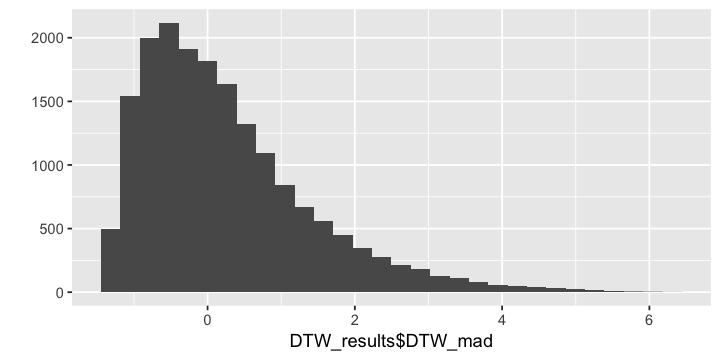

In [55]:
DTW_results$DTW_lScale <- scale(log(DTW_results$DTW))
DTW_results$DTW_scale <- scale(DTW_results$DTW)

M <- mad(DTW_results$DTW, center = median(DTW_results$DTW, na.rm = TRUE), na.rm=T)
DTW_results$DTW_mad <- (DTW_results$DTW-median(DTW_results$DTW, na.rm = TRUE))/M

qplot(DTW_results$DTW_mad)
write.table(file="./DTW_results.txt", DTW_results, sep="\t", quote=F, row.names=F)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

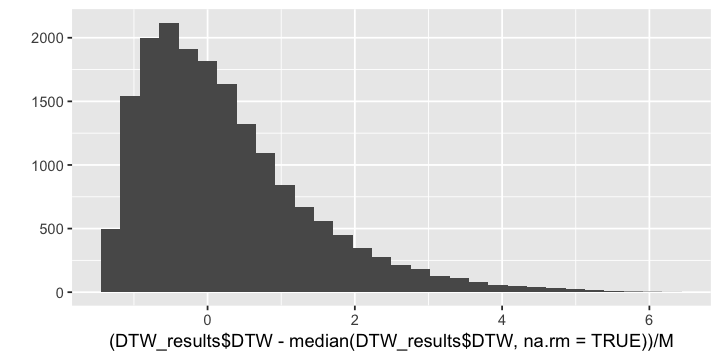

In [56]:
M <- mad(DTW_results$DTW, center = median(DTW_results$DTW, na.rm = TRUE), na.rm=T)
qplot((DTW_results$DTW-median(DTW_results$DTW, na.rm = TRUE))/M)

In [57]:
#options(repr.plot.width=5, repr.plot.height=3)
pdf(file="./DTW_histogram.pdf", wi=5, he=3.5)
ggplot(data=DTW_results, aes(x=DTW)) + 
    geom_histogram(bins=20, aes(fill=..x..), color='black') + 
    theme_bw() + 
    scale_fill_gradient2(low="cyan", high="orange", midpoint=median(DTW_results$DTW, na.rm=T)) +
    ylab("Count") + xlab("Time-Warping Distance")
dev.off()

Warning message:
“Removed 1152 rows containing non-finite values (stat_bin).”

pdf 
  2

In [ ]:
#try some dynamic time warping

#kernel crashes -- memory req too high?
#over 64GB in swap, try rerun with 100 interpolation points
#still too much going on

require(dtw)
require(proxy)

#ETU interpolates x genes
require(pheatmap)
require(RColorBrewer)

geneDists.dtw <- dist(splineBTx623.RN,method="DTW") #should make square, where dtwDist() is not
geneDistMatrix.dtw <- as.matrix( geneDists.dtw )

tsplineBTx623.RN <- data.frame(t(scale(splineBTx623.RN)))

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tsplineBTx623.RN,
         clustering_distance_rows = geneDists.dtw,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = F,
         col = colors,
         main="Log, z-scaled, Dynamic Time Warping")

In [ ]:
head(orth)

#use "No Gene" in maize1 or maize2 to count number of Sb-Zm orthologs
head(orth[(orth$maize1!="No Gene" | orth$maize2!="No Gene"),])
dim(orth[(orth$maize1!="No Gene" | orth$maize2!="No Gene"),])

In [ ]:
#create maize1 and maize2 subsets of orthology table
maize1 <- orth[(orth$maize1!="No Gene"),]
maize2 <- orth[(orth$maize2!="No Gene"),]
head(maize1)
head(maize2)

In [ ]:
### I made a mess.
# try to do a recip. lookup of orthologs
# if in ortho list, check in sorghum matrix
# if in sorghum, check in maize matrix

head(rownames(tsplineB73.RN)) #list of expressed maize genes
head(rownames(tsplineBTx623.RN)) #list of expressed sorghum genes

head(maize1$maize1) #list of maize1 maize orthologs
head(maize1$sorghum2) #list of maize1 sorghum orthologs

head(maize2$maize2) #list of maize2 maize orthologs
head(maize2$sorghum2) #list of maize1 sorghum orthologs

In [ ]:
head(match(maize1$maize1, rownames(tsplineB73.RN))) #match to find index of matches
length (match(maize1$maize1, rownames(tsplineB73.RN)))
head(which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))) ))
length (which(!is.na(match(maize1$maize1, rownames(tsplineB73.RN)))))
#which !is.na to take out NA values -- but why is the order of indicies changed?


In [ ]:
head(maize1$maize1[which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))))])
length(maize1$maize1[which( !is.na(match(maize1$maize1, rownames(tsplineB73.RN))))])

In [ ]:
# this is fugly code. is there a tidyverse way to get the same effect?
require (magrittr)

maize1$maize1 %>% match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize1$sorghum2[.] %>% 
      head ()
#much better
#take maize1 names, match to expressed gene set
#toss out NAs, then pull up names again

In [ ]:
require (magrittr) #for maize1 orthologs

SbZm1_recip_orth<- maize1$maize1 %>% 
      match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize1$sorghum2[.] %>% #find maize nonNAs
      match(. , rownames(tsplineBTx623.RN)) %>%
      {which( !is.na(.) )} %>% #check against sorghum nonNAs
      maize1$sorghum2[.] %>%
      match(., orth$sorghum2) %>%
      orth[.,] 
dim(SbZm1_recip_orth)
head(SbZm1_recip_orth)

In [ ]:
require (magrittr) #for maize2 orthologs

SbZm2_recip_orth<- maize2$maize2 %>% 
      match(. , rownames(tsplineB73.RN)) %>% 
      {which( !is.na(.) )} %>% 
      maize2$sorghum2[.] %>% #find maize nonNAs
      match(. , rownames(tsplineBTx623.RN)) %>%
      {which( !is.na(.) )} %>% #check against sorghum nonNAs
      maize2$sorghum2[.] %>%
      match(., orth$sorghum2) %>%
      orth[.,] 
dim(SbZm2_recip_orth)
head(SbZm2_recip_orth)

In [ ]:
#use maize1 Sb genes to subset and reorder Sb expression matrix
#use maize1 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize1.BTx623 <- tBTx623[match(maize1$sorghum2, rownames(tBTx623)),]

tB73 <- t(splineB73.RN)
maize1.B73 <- tB73[match(maize1$maize1, rownames(tB73)),]

head(maize1)
head(maize1.BTx623)
dim(maize1.BTx623)
head(maize1.B73)
dim(maize1.B73)

In [ ]:
match('Sobic.001G106200', rownames(maize1.BTx623))

In [ ]:
head(tBTx623)
head(maize1$sorghum2[2])
match(maize1$sorghum2[2], rownames(tBTx623))
head(t(tBTx623[match(maize1$sorghum2[2], rownames(tBTx623)),]))
head(maize1.BTx623[2,])

In [ ]:
#try running dtw for first orthogroup
require(dtw)

dtw.test <- dtw(scale(maize1.BTx623[644,]), scale(maize1.B73[644,]), keep=T)

options(repr.plot.width=6, repr.plot.height=6)
plot(dtw.test, type="twoway")
dtw.test
dtw.test$distance
dtw.test$normalizedDistance

In [ ]:
#try calucating distance for all orthopairs in maize1
dtw.dist <- dtw(t(maize1.BTx623)[,644], t(maize1.B73)[,644], distance.only=T)
summary(dtw.dist)

In [ ]:
require (dtw)
orthdist.dtw <- cbind(1, dtw(t(maize1.BTx623)[,1], t(maize1.B73)[,1], distance.only=T)$normalizedDistance)

for (ortho in 2:nrow(maize1.BTx623)) {
    orthdist.dtw <- rbind(orthdist.dtw, 
                          cbind(ortho, 
                                dtw(t(maize1.BTx623)[,ortho], t(maize1.B73)[,ortho], distance.only=T)$normalizedDistance))
}
dim(orthdist.dtw)
head(orthdist.dtw)

In [ ]:
dim(orthdist.dtw)
dim(maize1.BTx623)
tail(orthdist.dtw)

In [ ]:


for (ortho in 4929:nrow(maize1.BTx623)) {
    require(dtw)
    orthdist.dtw <- rbind(orthdist.dtw, 
                          cbind(ortho, 
                                dtw(t(maize1.BTx623)[,ortho], t(maize1.B73)[,ortho], distance.only=T)$normalizedDistance))
}

dim(orthdist.dtw)


In [ ]:
dim(maize1.BTx623)

require(ggplot2)
qplot(orthdist.dtw[,2])
min(orthdist.dtw[,2])

In [ ]:
#use maize2 Sb genes to subset and reorder Sb expression matrix
#use maize2 Zm genes to subset and reorder Zm expression matrix

tBTx623 <- t(splineBTx623.RN)
maize2.BTx623 <- tBTx623[tBTx623[maize2$sorghum2],]

tB73 <- t(splineB73.RN)
maize2.B73 <- tB73[tB73[maize2$maize2],]

head(maize2)
head(maize2.BTx623)
head(maize2.B73)

In [ ]:
#try calucating distance for all orthopairs in maize1
dtw.dist <- dtw(t(maize2.BTx623)[,50], t(maize2.B73)[,50], distance.only=T)
summary(dtw.dist)

In [ ]:
require (dtw)
orthdist2.dtw <- cbind(1, dtw(t(maize2.BTx623)[,1], t(maize2.B73)[,1], distance.only=T)$normalizedDistance)

for (ortho in 2:nrow(maize2.BTx623)) {
    orthdist2.dtw <- rbind(orthdist2.dtw, 
                          cbind(ortho, 
                                dtw(t(maize2.BTx623)[,ortho], t(maize2.B73)[,ortho], distance.only=T)$normalizedDistance))
}
dim(orthdist2.dtw)
head(orthdist2.dtw)

In [ ]:
require(ggplot2)
qplot(c(orthdist2.dtw[,2],orthdist.dtw[,2]), bins=5)

Need to construct ETU to Expression value matrix for each gene in B73 and BTx623
<br>Transpose count matrix
<br>For each gene in VSD count matrix:
<br><t>Create B73 ETU v Count
<br><t>Calculate correlation values
<br><t>Return correlation
<br>Histogram?
<br>Check high correlation genes for GO enrichment?

In [ ]:
# try to do some tree magic with dendextend
require (dendextend)
require (magrittr)

In [ ]:
dist.B73 <- as.dist((1 - cor(splineB73.RN)))


In [ ]:
dist.BTx623 <- as.dist((1 - cor(splineBTx623.RN)))


In [ ]:
dend.B73 <-  dist.B73 %>% # recall a distance matrix from above, 
         hclust(method = "average") %>% # on it compute hierarchical clustering using the "average" method, 
         as.dendrogram # turn that object into a dendrogram.

options(repr.plot.width=8, repr.plot.height=6)
dend.B73 %>% plot(main="B73 genes, unadjusted") # plot it

In [ ]:
dend.BTx623 <-  dist.BTx623 %>% # recall a distance matrix from above, 
         hclust(method = "average") %>% # on it compute hierarchical clustering using the "average" method, 
         as.dendrogram # turn that object into a dendrogram.

options(repr.plot.width=8, repr.plot.height=6)
dend.BTx623 %>% plot(main="BTx623 genes, unadjusted") # plot it

In [ ]:
#change maize names to sorghum orthologs (are duplicates permitted??)
#create tanglegram
head(SbZm1_recip_orth)
head(SbZm2_recip_orth)

# current labels
old.BTx623.labels <- labels(dend.BTx623)
old.B73.labels <- labels(dend.B73)
print("old B73")
head(old.B73.labels)

# match B73 names to sorghum orthologs for maize1 and maize2
new1.B73.labels <- old.B73.labels %>% 
                   match(., SbZm1_recip_orth$maize1) %>%
                   SbZm1_recip_orth$sorghum2[.] %>%
                   as.character()
print("B73 maize1 sorghum matches")
head (new1.B73.labels)

require(dplyr)
maize1.B73.labels <- new1.B73.labels %>%
                     {if_else(!is.na(.), #if it is not NA
                              new1.B73.labels, #keep the new label
                              old.B73.labels)} #otherwise, 

head (maize1.B73.labels)

#{which( is.na(.) )} %>%
#old.B73.labels[.] %>%
#match(., SbZm2_recip_orth$maize2) %>%

#SbZm1_recip_orth$sorghum2[.] %>%

#head()

# relabel dendrogram object with library names
#short.dend <- dend %>% set("labels", simple.labels)
#plot(dend)

In [ ]:
# relabel B73 dendrogram object with maize1 sorghum matches

dend.B73.relab1 <- dend.B73 %>% 
                    set ("labels", maize1.B73.labels)
plot(dend.B73.relab1)


In [ ]:
# check that it worked
changes <- dendlist(dend.BTx623, dend.B73.relab1)
pdf(file="./BTx623_B73_1.tanglegram.pdf", he=20, wi=20)
tanglegram(changes)
dev.off()

In [ ]:
#try the sort method -- didn't complete -- taking forever

pdf(file="./BTx623_B73_1.tanglegram.2.pdf", he=20, wi=20)
tanglegram(changes,
          sort=T,
          lwd=0.5,
          columns_width = c(3,5,3))
dev.off()

In [ ]:
inter <- intersect_trees(dend.BTx623,  dend.B73.relab1)

In [ ]:
## too hairy to understand
pdf(file="./BTx623_B73_1.tanglegram.2.pdf", he=20, wi=20)
tanglegram(inter,
          sort=T,
          lwd=0.5,
          columns_width = c(3,5,3))
dev.off()

In [ ]:
#maybe there is a more graceful way
#how about take the old labels
#if maize 1 match is not NA
#change value,
#else check maize 2,
#else don't change
require(dplyr)

maize12.B73.labels <- old.B73.labels %>% 
                       match(., SbZm1_recip_orth$maize1) %>%
                       SbZm1_recip_orth$sorghum2[.] %>%
                       as.character() %>%
                       {if_else(!is.na(.), #if it is not NA
                              ., #keep the new label
                              match(., SbZm2_recip_orth$maize2) %>%
                       SbZm2_recip_orth$sorghum2[.] %>%
                       as.character() %>%
                       {if_else(!is.na(.), #if it is not NA
                              ., #keep the new label
                              old.B73.labels)} #otherwise, revert to old label
head (old.B73.labels)
head (maize12.B73.labels)


In [ ]:
save.image(file="031818.RData")

In [ ]:
load(file="021918.RData")

In [9]:
#calculate rolling avg vsd per 'window' ETU

library (zoo)
library (ggplot2)
library (dplyr)
library (plyr)
library (magrittr)

window <- 1
bins <- seq(from=0, to=10, by=window)

vsdB73.ETU <- vsdB73
#colnames(vsdB73.ETU) <- B73_factors[colnames(vsdB73),2]
df <- data.frame(cbind(B73_factors[rownames(data.frame(vsdB73[1,])),]$ETU,vsdB73[1,]))
print(tapply(df$X2, cut(df$X1, bins), mean))
ddply(df, .(cut(df$X1, bins)), colwise(mean))



Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”
Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdif

   (0,1]    (1,2]    (2,3]    (3,4]    (4,5]    (5,6]    (6,7]    (7,8] 
5.143410 5.472040 5.505619 5.378024 5.492737 5.546678 5.561321 5.572502 
   (8,9]   (9,10] 
5.251358 5.386146 


cut(df$X1, bins) X2      
1  (0,1]            5.143410
2  (1,2]            5.472040
3  (2,3]            5.505619
4  (3,4]            5.378024
5  (4,5]            5.492737
6  (5,6]            5.546678
7  (6,7]            5.561321
8  (7,8]            5.572502
9  (8,9]            5.251358
10 (9,10]           5.386146
11 NA               5.109870

In [10]:
geneAvg <- function(GeneExpressionSlice, ETU_df, window) {
    
    bins <- seq(from=0, to=10, by=window)   
    df <- data.frame(cbind(ETU_df[rownames(data.frame(GeneExpressionSlice)),]$ETU, GeneExpressionSlice))
    return (tapply(df$GeneExpressionSlice, cut(df$V1, bins), mean))
    
    }

In [11]:
avgB73 <- cbind(geneAvg (vsdB73[1,], B73_factors, window))
colnames(avgB73)[1]<-rownames(vsdB73)[1]

for (rowN in 2:nrow(vsdB73)) {
    avgB73 <- cbind(avgB73, geneAvg (vsdB73[rowN,], B73_factors, window))
    colnames(avgB73)[rowN]<-rownames(vsdB73)[rowN]
}
#takes a while

In [12]:
avgBTx623 <- cbind(geneAvg (vsdBTx623[1,], BTx623_factors, window))
colnames(avgBTx623)[1]<-rownames(vsdBTx623)[1]

for (rowN in 2:nrow(vsdBTx623)) {
    avgBTx623 <- cbind(avgBTx623, geneAvg (vsdBTx623[rowN,], BTx623_factors, window))
    colnames(avgBTx623)[rowN]<-rownames(vsdBTx623)[rowN]
}
#takes a while

In [13]:
library(reshape2)
tBTx623 <- data.frame(t(scale(avgBTx623)))

colnames(tBTx623) <- seq(1,10,by=1)
max_val <- data.frame(apply(tBTx623,1,FUN=which.max))
colnames(max_val) <- "Col"

max_val.O <- max_val[rev(order(max_val$Col)), , drop=F]
head(max_val.O)
tBTx623.O <- tBTx623[rownames(max_val.O),]

head(tBTx623)
head(tBTx623.O)
df_heatmap <-melt(as.matrix(tBTx623.O))
head(df_heatmap)

Col
Sobic.K043400    10 
Sobic.K031800    10 
Sobic.010G279700 10 
Sobic.010G278700 10 
Sobic.010G278200 10 
Sobic.010G277800 10

1          2          3          4             5         
Sobic.001G000100  0.2763886 -1.5792592 -0.4270865  0.1688941843 -1.5792592
Sobic.001G000200 -0.7127639  0.2202248 -0.6879917 -0.0002959792 -2.1012603
Sobic.001G000400  0.4629111 -0.3048371 -1.3651683 -0.1273310539 -1.6847152
Sobic.001G000700 -0.5423200  0.5541322 -1.3075751 -0.6529098228 -1.4884123
Sobic.001G000800 -0.8741644  0.7419755 -1.2140380  0.3525531931  0.1193915
Sobic.001G000900  2.0735909 -1.2360069 -0.3754728 -0.3106332329  1.4289345
                 6           7          8          9         10         
Sobic.001G000100  0.21117331  0.5495308  1.7845328 0.3879943  0.20709106
Sobic.001G000200  0.05077745  0.2834667  0.5067203 1.5637846  0.87733798
Sobic.001G000400  0.10268817  0.1149967  1.5667693 1.2230925  0.01159388
Sobic.001G000700 -0.21537371  0.2263141  1.1960063 0.9873629  1.24277546
Sobic.001G000800 -1.69671225  0.1473800  1.6926716 0.5069697  0.22397307
Sobic.001G000900 -0.54017433 -0.1913469 -0.3916578 0.1630796 -0.62031307

1           2           3          4           5        
Sobic.K043400     0.06016242  0.05180465 -0.8854719 -0.31746208 -1.764928
Sobic.K031800    -1.04926955 -0.49381508 -0.5286691 -0.01341788 -1.904607
Sobic.010G279700 -1.89063078 -1.27390094 -0.3439939 -0.37313950  0.365981
Sobic.010G278700  0.42238034 -0.18668874 -1.2855806 -0.65146876 -1.897004
Sobic.010G278200  0.46321873  1.12017090 -1.3583182 -0.64062665 -1.229099
Sobic.010G277800 -0.90279977 -0.10725696 -1.0862166  0.16108978 -1.782667
                 6             7           8         9         10      
Sobic.K043400    -0.2715539323  0.22586441 0.2245003 0.5526242 2.124460
Sobic.K031800     0.5584132179  0.45951822 0.5581702 1.1906280 1.223049
Sobic.010G279700 -0.0001869309  0.54705032 0.6495677 1.1435786 1.175674
Sobic.010G278700  0.5405514819  0.23023973 0.8159108 0.8100182 1.201642
Sobic.010G278200 -0.5765590019 -0.55844741 1.0550992 0.3524013 1.372161
Sobic.010G277800  0.4970997653  0.03013197 0.7855899 1.0750799 1.329949

Var1             Var2 value      
1 Sobic.K043400    1     0.06016242
2 Sobic.K031800    1    -1.04926955
3 Sobic.010G279700 1    -1.89063078
4 Sobic.010G278700 1     0.42238034
5 Sobic.010G278200 1     0.46321873
6 Sobic.010G277800 1    -0.90279977

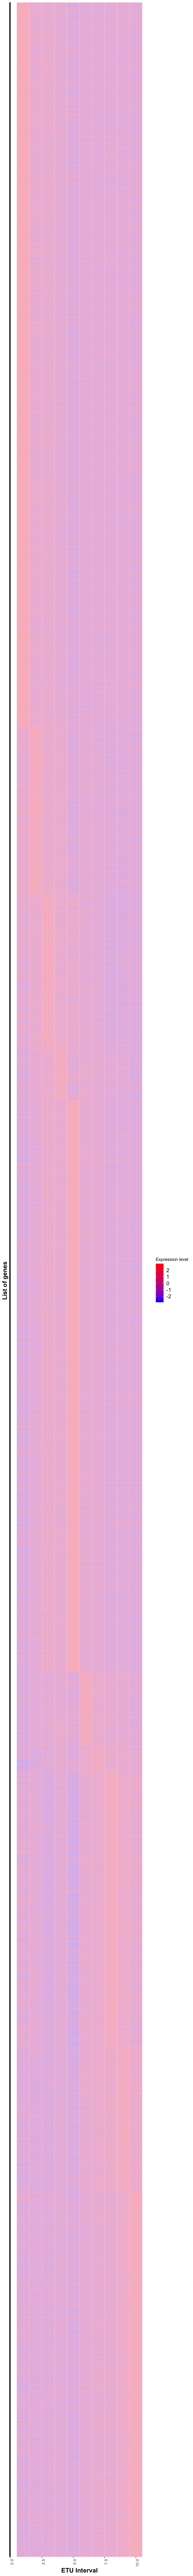

In [14]:
options(repr.plot.width=6, repr.plot.height=80)
library(ggplot2)
ggplot(df_heatmap, aes(Var2, Var1)) +
  geom_tile(aes(fill = value), color = "white") +
  scale_fill_gradient(low = "blue", high = "red") +
  ylab("List of genes ") +
  xlab("ETU Interval") +
  theme(legend.title = element_text(size = 10),
        legend.text = element_text(size = 12),
        plot.title = element_text(size=16),
        axis.title=element_text(size=14,face="bold"),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.text.y = element_blank()) +
  labs(fill = "Expression level" ) 


In [15]:
#try normal gene heatmap
#samples x genes
require(pheatmap)
require(RColorBrewer)

geneDists <- as.dist((1 - cor(avgBTx623)))
geneDistMatrix <- as.matrix( geneDists )



Loading required package: pheatmap
Loading required package: RColorBrewer


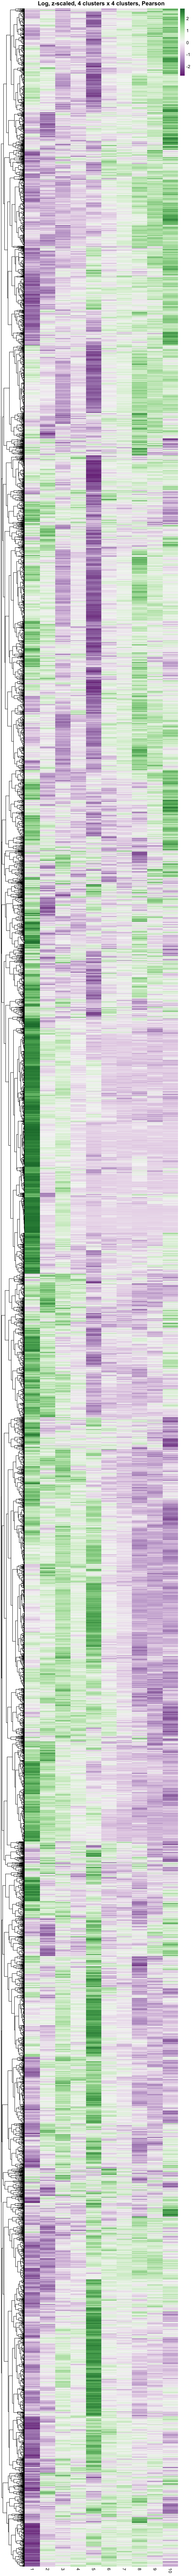

In [16]:

colors <- colorRampPalette( brewer.pal(9, "PRGn"))(200)
pheatmap(tBTx623,
         clustering_distance_rows = geneDists,
         cluster_rows=TRUE, cluster_cols=FALSE,
         show_rownames = F, show_colnames = T,
         col = colors,
         main="Log, z-scaled, 4 clusters x 4 clusters, Pearson")